<a href="https://colab.research.google.com/github/joshuajhchoi/ai2learn/blob/master/Titanic_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Titanic 입문

타이타닉 EDA to Prediction

* 타이타닉 챌린지는 나이, 성별 또는 승객 클래스와 같은 변수를 기반으로 주어진 승객의 생존 또는 사망을 예측하는 경쟁입니다.
* 앞에서 사이킷런을 공부하기 위해 같은 샘플을 해보았습니다.
* 사이킷런 기반으로 분석을 해보겠습니다.
* 부족하지만 초보자들을 위해 잔 설명들도 최대한 많이 넣어 보려고 노력합니다.



사이킷런 (sklearn이라고도 부름) 은 무료 소프트웨어로 파이썬 프로그래밍 언어를 위한 머신러닝 라이브러리이다.
Classification, Regression, Clustering, Descision Tree 등의 다양한 알고리즘을 적용할 수 있는 함수들을 제공하며 현재도 수 많은 알고리즘이 추가적으로 제공되고 있습니다.
사이킷런 자체 샘플 데이터도 있고, UC Irvine 에서 제공하는 데이터도 있습니다. 우리는 캐글대회의 기본인 타이타닉으로 작업을 하며 이해를 하겠습니다.

* 목차
1. 중요 모듈 임포트 및 데이터 불러오기
2. 데이터 정리
3. 데이터 공부
4. Exploratory Data Analysis
5. Feature Engineering
6. 머신러닝 모델 만들기
7. 모델 예측 

## Task 1 - 중요 모듈 임포트 및 데이터 불러오기

* 자료 다운로드하기
[자료 다운로드](https://www.kaggle.com/c/3136/download-all)

으로 가서 파일을 다운로드 한다. (Kaggle note에서 할 때는 불러 오는 것이 좀 더 단순하나 주피터 노트북에서 할 때는 다운로드 및 임포트를 해야한다.)

* 필요한 것들을 임포트 좀 해야겠죠.



In [0]:
import math, time, random, datetime

In [0]:
# 기본 데이터 정리 및 처리
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# 전처리 및 머신 러닝 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

# 경고 제거
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

* 파일을 보겠습니다.

* Kaggle에서는 우측의 Data에 가셔서 input 에서 원하는 파일을 보세요

* 다운로드한 파일을 업로드하여 임포트 합니다.

In [4]:
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission (1).csv
Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


## Task 2 - 데이터 정리

* 이어서 이를 데이터프레임에 임포트하여 데이터셋이 판다스 데이터프레임에 임포트 되도록 합니다.

In [0]:
import io
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
gender_submission = pd.read_csv(io.BytesIO(uploaded['gender_submission.csv']))

* 파일 분리 및 병합

* ntrain과 ntest의 shape을 확보해놓습니다. (병합 한 것을 나중에 다시 갈라 놓기 위한 준비)
* y_train은 알려진 결과 값이니 따로 모셔 놓고
* 테스트의 승객 아이디는 나중에 최종 결과에 넣을 것이기 때문에 따로 떼어 놓습니다.
* train과 test를 병합하여 data 란 파일을 만듭니다. 문자로 된 것을 숫자로 바꾼다든가.숫자를 인터발 별로 그룹화 한다든가 할 때 한꺼번에 하기 위해 합해 놓습니다. 

In [6]:
# 병합 준비
ntrain = train.shape[0]
ntest = test.shape[0]

# 아래는 따로 잘 모셔 둡니다.
y_train = train['Survived'].values
passId = test['PassengerId']

# 병함 파일 만들기
data = pd.concat((train, test))

# 데이터 행과 열의 크기는
print("data size is: {}".format(data.shape))

data size is: (1309, 12)


* 파일을 보겠습니다.

In [7]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 최초 (Wild) Guess
 
* 항목을 보면 PClass 는 객실의 레벨인 것 같습니다. 1이 제일 좋은 곳이고 3이 제일 낮은 곳인 것 같습니다.
* 이름은 별 의미가 없을 수도 있으나 중간에 Mr. Miss, Mrs 등이 아닌 master, rev, capt 등이 나오는데 이는 의미가 있습니다.
* Sex는 중요합니다. 보나마나 여성과 아이들을 우선적으로 구명 보트에 타게 했을 것이므로 남성이면 사망 확률이 훨씬 높지요
* Age도 중요합니다. 어릴 수록 구명 보트에 탔을 가능성이 크니까요
* SibSp는 배우자나 형제들과 같이 탄 즉, 가족의 숫자를 나타내므로 가족이 있는 사람의 생존 확률은 컸을 것이라 사료 됩니다.
* Parch 는 부모, 아이들이 같이 탄 경우니까, 역시 생존 확률이 좀 더 높을 것이라 생각됩니다.
* Ticket은 어떻게 의미를 두어야 할지 아직 파악이 안 됩니다. Fare나 Cabin과 연관이 있을 것입니다.
* Fare는 비쌀 수록 생존 확률이 높을 가능성이 클 것으로 생각됩니다.
* Cabin도 정해진 캐빈에서의 생존률이 더 높을 수 있습니다. NaN은 Not a number란 뜻인데 아마도 크루이었거나 정확한 방 배정이 안 된 단체로 자는 사람들이 아니었나는 생각이 들기도 합니다.
* Embarked는 어디서 탔냐는 이야기인데, 큰 요인은 아닐 것이라는 것이 최초 추측이나 현대와 달리 부자 사는 동네부터 노동자 사는 동네까지 그 당시에는 확연히 달랐을 경우 영향이 있을 것이라 생각 됩니다.

* 이제 하나씩 훓어 보며 작업을 해보겠습니다.
* 우리의 목표는 train에서 모델을 뽑아서 test에서 누가 살아 남았을 확률이 큰가를 뽑아 내는 것입니다.

#### describe 보기

In [9]:
data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


* 위를 보시면 숫자로 된 열들의 길이, 중간 값, 표준편차 등이 나와 있습니다. 

#### 열 헤드 보기

* 열 이름을 보겠습니다.

In [10]:
data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

* 우리 여기서 인덱싱 같은 것도 가능합니다. (지금 필요한 것은 아니지만 연습 삼아, 파이썬 기초 반 때 기억을 되살리며)

In [11]:
data.columns[3]

'Fare'

#### missing data 보기

##### 빠진 데이터를 보겠습니다.

* 이는 중요합니다.
* 예를 들어 나이가 빠져 있으면 사망자일 확률이 높을 수도 있고 등 등
* 무엇보다 데이터가 없으면 분석을 할 수가 없겠지요?


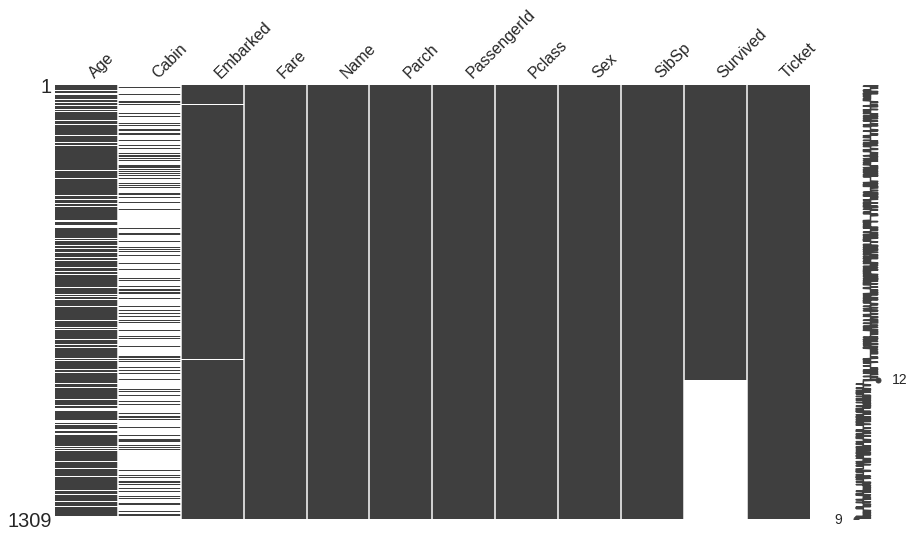

In [12]:
missingno.matrix(data, figsize = (15,8))

* 보시다시피 '나이'와 '캐빈' 번호에서 구멍이 많습니다.
* 빈칸의 숫자를 보겠습니다.

In [13]:
data.isnull().sum() #비어 있는 값들을 체크해 본다.

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

* sum 말고 any를 쓰면 특정 행에 비어 있는 것이 True(=빈 것 있음) False(= 빈 것 없음)를 알 수 있습니다. 

In [14]:
data.Age.isnull().any()

True

* 머신러닝 툴은 빈칸을 아주 싫어 합니다.
* 나중에 이를 어떻게 할 것인지 좀 생각해 보겠습니다.

* 각 열의 데이터 타입을 보겠습니다.

In [15]:
data.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

* 나중에 오브젝트로 된 것은 컴퓨터가 분석하기 좋게 숫자로 바꾸어 주어야 할 것입니다.

#### 항목의 종류

#### 범주형 항목 (Categorical Features)
범주형 변수는 둘 이상의 결과 요소가 있는 변수이며 해당 기능의 각 값을 범주별로 분류 할 수 있습니다. 예를 들어 성별은 두 가지 범주 (남성과 여성)의 범주 형 변수입니다. ** 이산형 변수(discrete variable) = 범주형 변수 (categorical variable) 의 하나로 명목 변수 norminal variable **라고도합니다.

** 데이터 셋에서 명목 항목 : Sex, Embark ** 이며 우리는 Name, Ticket 등을 이로 변환해야 할 것 같습니다.

Ordinal Variable :
순위 변수는 범주 형의 하나지만 그 차이점은 값 사이의 상대 순서(=서열) 또는 정렬이 가능하다는 것입니다. 예를 들어 값이 ** Tall, Medium, Short ** 인 ** Height **와 같은 피처가있는 경우 Height는 서수 변수입니다. 여기서 변수에 상대적인 정렬을 할 수 있습니다.

** 데이터 셋에서 순위 항목 : PClass ** 이며 우리는 Cabin을 이 범주로 변환해서 사용해야 할 것 같습니다.

#### 연속형 항목 (Continuous Features):
서로 연속된 값을 가진 변수를 가진 항목이며 여기에서 우리는 연령을 대표적인 것으로 볼 수 있습니다. 

** 데이터 셋에서 순위 항목 : Age ** 이며, Age, SipSp, Parch, Fare는 interval variable로 만들어 이에 적용해야 할 것 같습니다.


####항목 정보

https://www.kaggle.com/c/titanic/data
* 위의 링크에 가면 데이터 항목의 딕쇼너리를 보실 수 있습니다.

      Variable       Definition                Key

      survival	    Survival	             0 = No, 1 = Yes

      pclass	      Ticket class	         1 = 1st, 2 = 2nd, 3 = 3rd

      sex	          Sex	

      Age	          Age in years	

      sibsp	        # of siblings / spouses aboard the Titanic	

      parch	        # of parents / children aboard the Titanic	

      ticket	      Ticket number	

      fare	        Passenger fare	

      cabin	        Cabin number	

      embarked	    Port of Embarkation	     C = Cherbourg, Q = Queenstown, S = Southampton

## Task 4 -  Exploratory Data Analysis

* train파일 순서대로 데이터 파일의 열들을 봅니다.

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* 파일 각 열의 상관 관계를 보겠습니다.

* Co-relation 매트릭스는 seaborn에서 변수 간 상관 계수를 보여주는 표입니다. 표의 각 셀은 두 변수 간의 상관 관계를 보여줍니다. 상관 매트릭스는 고급 분석에 대한 입력 및 고급 분석에 대한 진단으로 데이터를 요약하는 데 사용됩니다.
참고: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
* 아래 마스크 셋업은 0로 행렬을 상관 행렬과 같은 모양으로 만든 후 여기에 불리안 값을 넣고 이를 다시 True만 만듭니다.
* triu 는 우측 상단 삼각행렬을 의미 
* annot= True는 각 셀에 숫자를 표시하라는 것이고, False는 하지 말라는 것이구요
https://seaborn.pydata.org/generated/seaborn.heatmap.html
*이어서 이를 heatmap으로 런칭합니다.


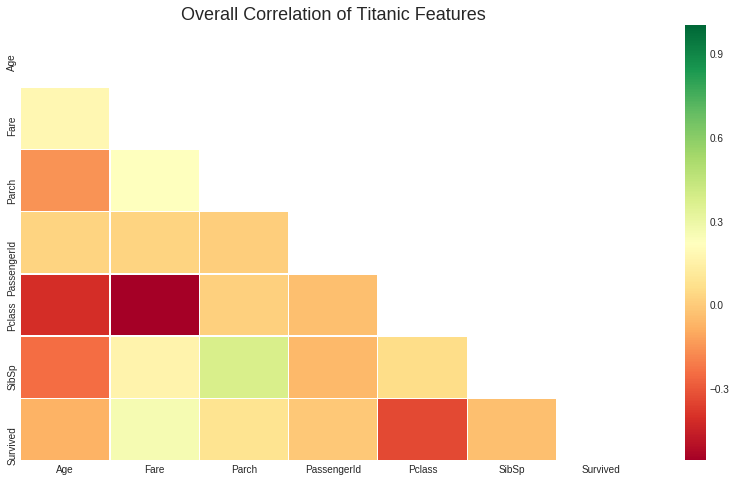

In [17]:
# Co-relation 매트릭스
corr = data.corr()
# 마스크 셋업
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# 그래프 셋업
plt.figure(figsize=(14, 8))
# 그래프 타이틀
plt.title('Overall Correlation of Titanic Features', fontsize=18)
#  Co-relation 매트릭스 런칭
sns.heatmap(corr, mask=mask, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

### Task 4.1 - "Surived" 분석

* 한 열씩 검토해 보겠습니다.

* Survived -  ** Key: (0 - Not Survived, 1- Survived) **

* Survived는 수자로 값을 주지만 Categorical Variable인 셈입니다.
* 죽던지 살던지 둘 중 하나의 값을 줍니다.

* countplot을 그려 봅니다.
* 사이즈는 가로 10인치 세로 2인치
* 생존 여부 0과 1의 숫자를 세어 본 후 그림을 그리도록 명령을 하는 것입니다.
* pyplot(plt)의 figure라는 메소드를 써서 그림판의 크기를 정하고, seaborn의 카운트플롯을 그리라는 것입니다.
* 

0    549
1    342
Name: Survived, dtype: int64


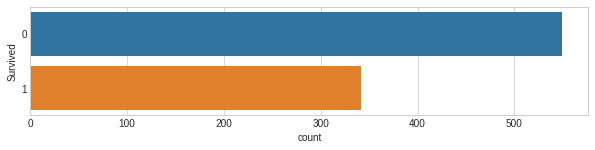

In [18]:
fig = plt.figure(figsize=(10,2))
sns.countplot(y='Survived', data=train)
print(train.Survived.value_counts())

* 불행히도 사망자가 훨씬 많아 보입니다.
* 전체 사망자 비율을 좀 보겠습니다. 

* 파이그래프랑 카운트 플롯을 서브플롯으로 그립니다.
* 행은 하나 열은 2개의 서브 플롯입니다. 사이즈는 가로 15인치 세로 6인치
* 'Survived'의 값을 카운트해서 파이플롯을 만듭니다. 
* explode는 폭발하는 것이니까 1이면 튀어 나가는 것인데 0을 주면 분리만 되고 돌출은 되지 않습니다. 이어서 0, 1인 것은 첫 번째 것은 아니고 두번 째 것은 분리된다는 의미로 생각하시면 됩니다.
* autopercent는 1.1이 표현하는 부분은 소수점 한 자리까지 보여 주라는 의미입니다. 뒤에 점 이하가 4면 둘 다 소수점 4자리수 까지 보여 줍니다.
* ax[0]은 첫번째 칸입니다.
* set_title 메소드는 서브 플롯의 제목을 보여 줍니다.   

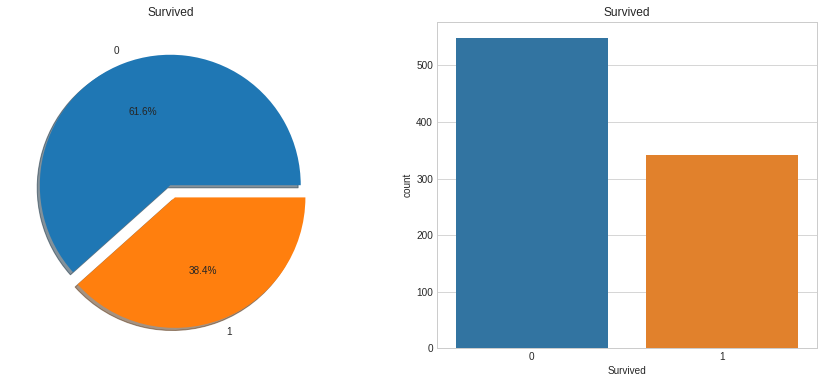

In [19]:
f,ax=plt.subplots(1,2,figsize=(15,6))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

* 위의 것을 아래와 같이 함수로 만들겠습니다. (물론 자주 쓰이지는 않겠지만 연습이니)

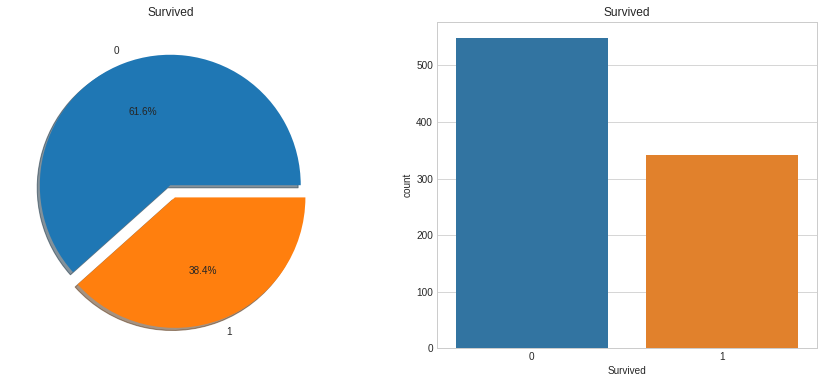

In [20]:
def piecount(a):
    f,ax=plt.subplots(1,2,figsize=(15,6))
    train[a].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_title(a)
    ax[0].set_ylabel('')
    sns.countplot(a,data=train,ax=ax[1])
    ax[1].set_title(a)
    plt.show()

piecount('Survived')

* 문제는 위의 함수가 달랑 두개의 값만 가진 것에 통한다는 사실입니다.
* 그럼 저 함수를 Pclass에 쓰면 3개 값이라 에러가 날 것입니다.
* 이 때는 위를 클래스를 만들고 파이썬 수업에서 배운 오버라이딩을 해줘야죠. 하지만 용도에 대비해서 너무 과도 한 일이라 3개 짜리를 다시 한 번 만들어 봅니다. 살짝만 바꾸어 봅니다. 

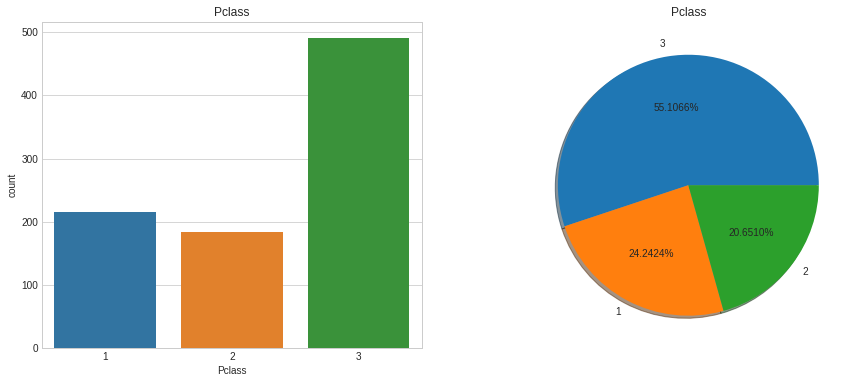

In [21]:
def piecount3(a):
      f,ax=plt.subplots(1,2,figsize=(15,6))
      train[a].value_counts().plot.pie(explode=[0,0.0,0],autopct='%0.4f%%',ax=ax[1],shadow=True)
      ax[1].set_title(a)
      ax[1].set_ylabel('')
      sns.countplot(a,data=train,ax=ax[0])
      ax[0].set_title(a)
      plt.show()

piecount3("Pclass")

### Task 4.2 - "Pclass" 분석

* Pclass는 값이 숫자이나 서열이 정해진 Ordinal Feature이다. 

Key:1 = 1st, 2= 2nd, 3 = 3rd

* 각 클래스 당 생존자를 보겠습니다.

In [22]:
train.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [23]:
pd.crosstab(train.Pclass,train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


*1등급 객실의 사람들은 생존자가 더 많고, 2등급은 생존자에 비해 사망자가 조금 더 많으나, 3등급은 사망자가 3배 이상 많다는 것을 알 수 있습니다.

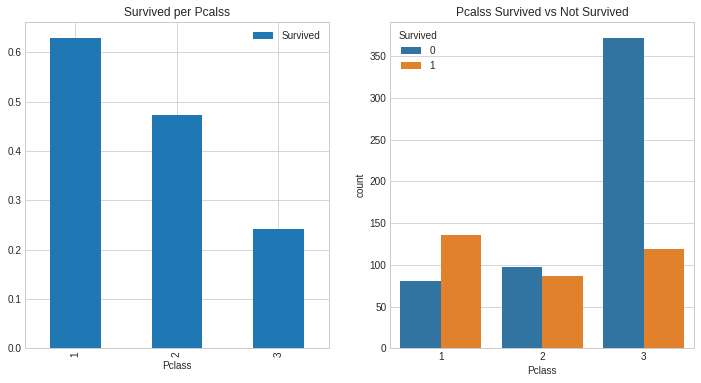

In [24]:
f,ax=plt.subplots(1,2,figsize=(12,6))
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived per Pcalss')
sns.countplot('Pclass',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Pcalss Survived vs Not Survived')
plt.show()

* 위에 만든 함수를 한 번 써 먹어 볼까요?

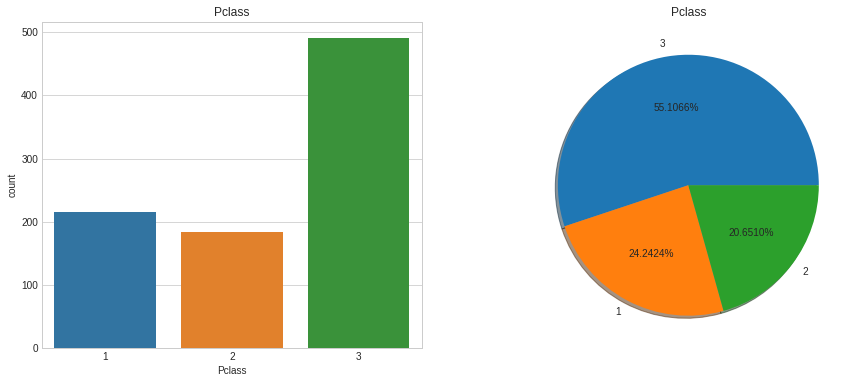

In [25]:
piecount3("Pclass")

* %는 3등칸이 반이 넘으나 위의 그래프에서 생존자는 1등석이 가장 많다는 것을 알 수 있습니다.
* 각 클래스 당 생존률을 볼까요?

In [26]:
train.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

*위에 것도 함수로 만들죠

### Task 4.3 - "Name" 분석

* 이름은 거의 모두 다를 가능성이 큽니다. Family Name, First Name, Middle Name and even Dr. Capt, master and so on 모두 감안하면...
* 분류를 한 번 해 봅니다.
* 리스트를 한 번 주 욱 보겠습니다.

In [27]:
data.Name.value_counts()

Kelly, Mr. James                       2
Connolly, Miss. Kate                   2
Krekorian, Mr. Neshan                  1
Oreskovic, Mr. Luka                    1
Hipkins, Mr. William Edward            1
                                      ..
Hagardon, Miss. Kate                   1
van Billiard, Master. James William    1
Ostby, Mr. Engelhart Cornelius         1
Waelens, Mr. Achille                   1
Sage, Miss. Dorothy Edith "Dolly"      1
Name: Name, Length: 1307, dtype: int64

* 이름은 언뜻 보아서 감이 안 옵니다. 중간에 있는 Mr. 같은 호칭을 볼까요. 
* ['Initial']이란 열을 새로 만들어서 여기에 Name에서 추출한 Regular Expression을 넣습니다.
* 아래에서 str.extract('([A-Za-z]+)\.')부분은 str에서 대문자 A~Z, 소문자 a~z 중에 \. 명령을 통해 .으로 끝나는 부분을 추출해 내는 것입니다.  
* ('^([A-Za-z]+)')으로 하면 처음에 나오는 문자 덩어리가 될 것이고 +를 빼면 첫 스펠링 한캐릭터만 추출합니다. 

In [0]:
temp = data.copy()
temp['Initial']=0
for i in train:
    temp['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

* 이를 성별로 봅니다.

In [29]:
pd.crosstab(temp.Initial,temp.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


* 생존률로 봅니다.

In [30]:
def survpct(a):
  return temp.groupby(a).Survived.mean()

survpct('Initial')

Initial
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dona             NaN
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

* 생존 숫자로 봅니다.

In [31]:
pd.crosstab(temp.Initial,temp.Survived).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,0,1,4,1,0,1,17,55,0,0,436,26,0,6,0
1.0,0,1,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1


* test 에 있는 Dona의 나이를 보고 어디에 넣을지 보겠습니다.
* Ms. 는 현대처럼 Miss + Mrs를 합친 말이 아니라 당시에는 귀족미망인을 의미하는 것이 었습니다. Mlle나 Mme등도 마드모아젤과 마담의 줄인말일 경우일 것입니다. 귀족 여성들로 보아야겠죠.

### Task 4.4 - "Sex" 분석



* 함수를 만들어서 train파일을 보지요

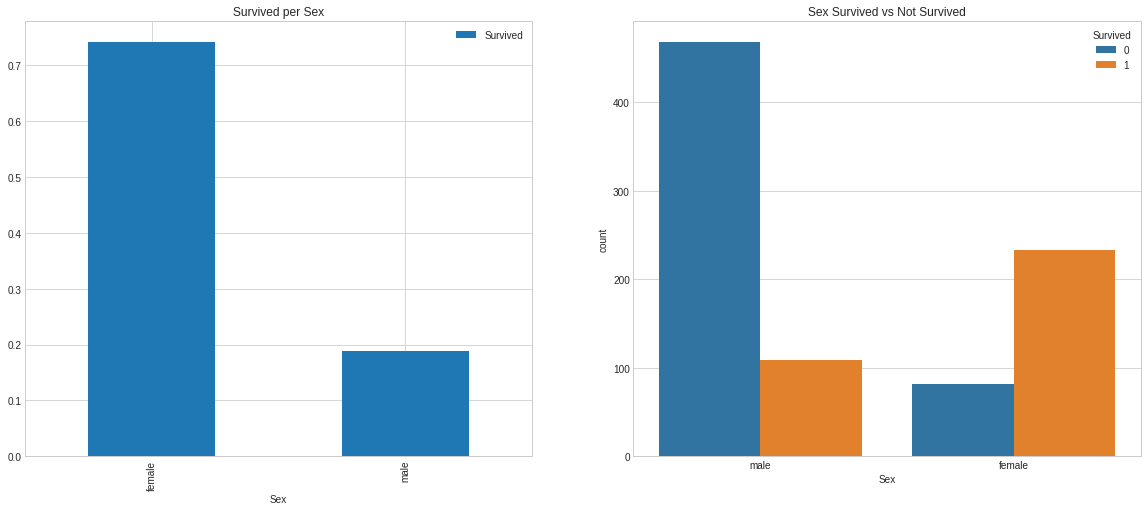

In [32]:
def bag(a,b,c,d):
  f,ax=plt.subplots(1,2,figsize=(20,8))
  train[[a,b]].groupby([a]).mean().plot.bar(ax=ax[0])
  ax[0].set_title(c)
  sns.countplot(a,hue=b,data=train,ax=ax[1])
  ax[1].set_title(d)
  plt.show()

bag('Sex','Survived','Survived per Sex','Sex Survived vs Not Survived')  

* 배에 있던 남자의 수는 여자의 수보다 훨씬 많습니다. 여전히 생존 여성 수는 남성 수의 거의 두 배입니다. ** 선박 여성의 생존율은 약 75 % 인 반면 남성의 생존율은 약 18-19 %입니다. **

* 이 것은 남성/여성을 1,2로 나누면 될 것 같은 뻔해 보이는 것이지만 좀 더 새분화하면 좋아 보입니다.
* 예를 들어 아기들은 아기이지, 남자인지 여자인지 구명보트 태울 때 안 물어 볼 것이기 때문입니다.
* 오히려 (불행하게도) 귀족 아기인지 서민의 아기인지는 행과불행을 가를 수 있습니다 ㅠㅠ
* 생존 Pclass별로 성별을 봅니다.

In [33]:
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

* 사회는 불공평 했으나 최소한 남자들의 신사도는 있었다고 할 수 있을 것 같습니다.

### Task 4.5 - "Age" 분석

* Age는 Continuous한 값입니다.
* 빈칸이 많아서 빈칸처리가 결정적인 역할을 할 것 같습니다.

* Age의 최대, 최소, 중간을 보겠습니다.

In [34]:
print('Oldest Passenger was ',data['Age'].max(),'Years')
print('Youngest Passenger was ',data['Age'].min(),'Years')
print('Average Age on the ship was ',int(data['Age'].mean()),'Years')

Oldest Passenger was  80.0 Years
Youngest Passenger was  0.17 Years
Average Age on the ship was  29 Years


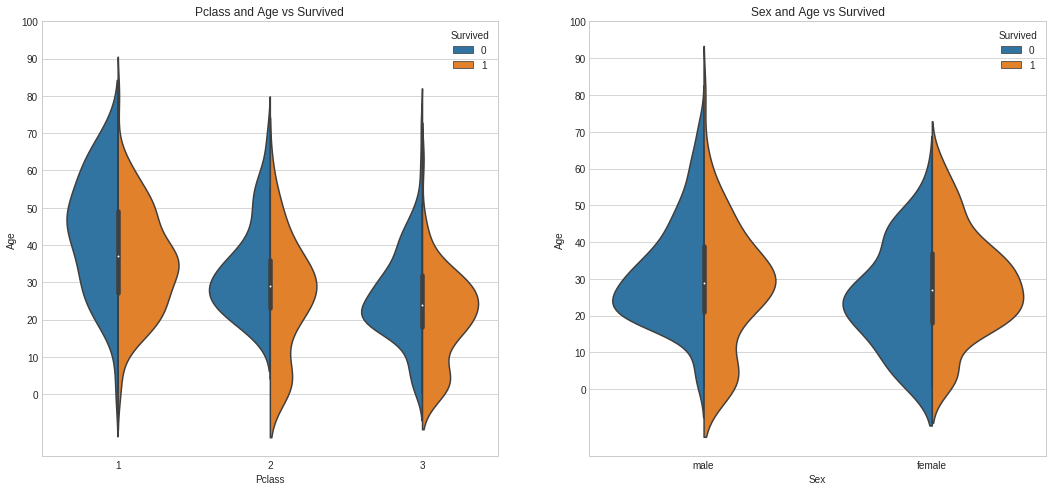

In [35]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

#### 관찰 :

1) Pclass에 따라 어린이 수가 증가하고 10 세 미만의 어린이 (즉, 어린이)의 생존율은 Pclass에 상관없이 양호해 보입니다.

2) Pclass1에서 20-50세의 Passeneger의 생존 가능성은 높고 여성에게는 더 좋습니다.

3) 남성의 경우 생존 확률은 나이가 증가함에 따라 감소합니다.

* 우선 age의 빈칸 부터 해결 합니다.

* 앞에서 살펴본 것처럼 Age 항목에는 ** 177 ** null 값이 있습니다. 이러한 NaN 값을 대체하기 위해 데이터 집합의 평균 수명을 지정할 수 있습니다.

* 그러나 문제는 평균 연령이 29 세를 4세 아이에게 할당 할 수 없습니다. 승객이 어떤 연령대에 있는지 알 수있는 방법이 있을까요? 이름에서 힌트를 찾아 봅니다.
* Task 5에서 해봅니다.

## Task 5 - Feature Engineering

### Task 5.1 Age, Name & Sex

*이름부터 시작하겠습니다.

In [36]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


* Initial 별 평균 연령을 보고 적용 시키는 것이 좋을 것 같습니다.

In [37]:
temp.groupby('Initial')['Age'].mean() #이니셜 별 평균 연령 체크

Initial
Capt        70.000000
Col         54.000000
Countess    33.000000
Don         40.000000
Dona        39.000000
Dr          43.571429
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       5.482642
Miss        21.774238
Mlle        24.000000
Mme         24.000000
Mr          32.252151
Mrs         36.994118
Ms          28.000000
Rev         41.250000
Sir         49.000000
Name: Age, dtype: float64

* capt.이 70세인 것 보니 대위 캡틴이 아니라 선장 캠틴인 것 같습니다. 
* Dona는 Mrs로 넣겠습니다.
* 이니셜 별 평균 연령을 빈칸에 넣도록 합니다.


In [0]:
temp['Newage']=temp['Age']

def newage(k,n):
  temp.loc[(temp.Age.isnull())&(temp.Initial==k),'Newage']= n
      
newage('Capt',int(70.000000))
newage('Col',int(54.000000))
newage('Countess',int(33.000000))
newage('Don',int(40.000000))
newage('Dona',int(39.000000))
newage('Dr',int(43.571429))
newage('Jonkheer',int(38.000000))
newage('Lady',int(48.000000))
newage('Major',int(48.500000))
newage('Master',int(5.482642))
newage('Miss',int(21.774238))
newage('Mlle',int(24.000000))
newage('Mme',int(24.000000))
newage('Mr',int(32.252151))
newage('Mrs',int(36.994118))
newage('Ms',int(28.000000))
newage('Rev',int(41.250000))
newage('Sir',int(49.000000))



In [39]:
temp['Age'][70:80]

70    32.00
71    16.00
72    21.00
73    26.00
74    32.00
75    25.00
76      NaN
77      NaN
78     0.83
79    30.00
Name: Age, dtype: float64

In [40]:
temp['Newage'][70:80]

70    32.00
71    16.00
72    21.00
73    26.00
74    32.00
75    25.00
76    32.00
77    32.00
78     0.83
79    30.00
Name: Newage, dtype: float64

In [41]:
survpct('Newage')


Newage
0.17     NaN
0.33     NaN
0.42     1.0
0.67     1.0
0.75     1.0
        ... 
70.50    0.0
71.00    0.0
74.00    0.0
76.00    NaN
80.00    1.0
Name: Survived, Length: 98, dtype: float64

In [42]:
pd.crosstab(temp.Newage,temp.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0.0,1.0,All
Newage,,,
0.42,0,1,1
0.67,0,1,1
0.75,0,2,2
0.83,0,2,2
0.92,0,1,1
1.0,2,5,7
2.0,7,3,10
3.0,1,5,6
4.0,3,7,10


* qcut으로 나이 그룹을 나누어 보겠습니다.

In [43]:
temp['Age_Range']=pd.qcut(temp['Newage'],10)
def groupmean(a,b):
  return temp.groupby([a])[b].mean().to_frame().style.background_gradient(cmap='summer_r')

groupmean('Age_Range', 'Newage')

,Newage
Age_Range,
"(0.169, 16.0]",7.75824
"(16.0, 21.0]",19.6117
"(21.0, 23.0]",22.3786
"(23.0, 26.0]",24.8319
"(26.0, 30.0]",28.5839
"(30.0, 32.0]",31.8844
"(32.0, 33.0]",32.92
"(33.0, 39.0]",36.2931
"(39.0, 48.0]",43.7835


In [44]:
groupmean('Age_Range', 'Survived')

,Survived
Age_Range,
"(0.169, 16.0]",0.548077
"(16.0, 21.0]",0.385714
"(21.0, 23.0]",0.380952
"(23.0, 26.0]",0.369863
"(26.0, 30.0]",0.4
"(30.0, 32.0]",0.198718
"(32.0, 33.0]",0.411765
"(33.0, 39.0]",0.504762
"(39.0, 48.0]",0.357143


* 별로 마음에 안 들어서 Age Group을 제가 나누어 봅니다.

* 1살 미만 baby -1
* 1살 - 3살 Toddler  2
* 3살 초과 - 11살 young kid  - 7
* 11살 초과 - 15미만 big kid  - 13
* 15-17 살 Boy/Girl - 16
* 17이상 20미만 Youth - 18
* 20- 22 Very Young - 21
* 22- 26 Young man  -24
* 26 - 30  - 28
* 30 -32 Active  - 31
* 32 -34 Manager  - 33
* 34  - 38 Director  - 36
* 38 - 52 Mid  - 45
* 52-79 Old  - 63
* 78이상 Senior  - 80

In [45]:
temp.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,Newage,Age_Range
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,22.0,"(21.0, 23.0]"
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,38.0,"(33.0, 39.0]"
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,26.0,"(23.0, 26.0]"
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,35.0,"(33.0, 39.0]"
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,35.0,"(33.0, 39.0]"
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,Mr,32.0,"(30.0, 32.0]"
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,Mr,54.0,"(48.0, 80.0]"
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,Master,2.0,"(0.169, 16.0]"
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,Mrs,27.0,"(26.0, 30.0]"
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Mrs,14.0,"(0.169, 16.0]"


* 이를 기준으로 Sex로 돌아갑니다
* 성별에서 마무리를 하지 않았습니다.
* 성별을 다시 봅니다.

* Gender란 열을 만들어 여기에 귀족 남, 일반남, 귀족녀, 일반녀, 베이비, 노인을 만듭니다.
* 일단 클래스로 남녀를 나눈 다음 이들을 다시 재분류 합니다. 

In [0]:
temp['Gender']= temp['Sex']

for n in range(1,4):
  temp.loc[(temp['Sex'] == 'male') & (temp['Pclass'] == n),'Gender']= 'm'+str(n)
  temp.loc[(temp['Sex'] == 'female') & (temp['Pclass'] == n),'Gender']= 'w'+str(n)

temp.loc[(temp['Gender'] == 'm3'),'Gender']= 'm2'
temp.loc[(temp['Gender'] == 'w3'),'Gender']= 'w2'
temp.loc[(temp['Age'] <= 1.0),'Gender']= 'baby'
temp.loc[(temp['Age'] > 75.0),'Gender']= 'old'



In [47]:
groupmean('Gender', 'Survived')

,Survived
Gender,
baby,0.857143
m1,0.358333
m2,0.127803
old,1
w1,0.968085
w2,0.638889


* 다시 돌아와서 Age를 그룹화 시킵니다. Agroup이라고 이름 짓겠습니다.

* 1살 미만 baby -1
* 1살 - 3살 Toddler  2
* 3살 초과 - 11살 young kid  - 7
* 11살 초과 - 15미만 big kid  - 13
* 15-17 살 Boy/Girl - 16
* 17이상 20미만 Youth - 18
* 20- 22 Very Young - 21
* 22- 26 Young man  -24
* 26 - 30  - 28
* 30 -32 Active  - 31
* 32 -34 Manager  - 33
* 34  - 38 Director  - 36
* 38 - 52 Mid  - 45
* 52-75 Old  - 63
* 75이상 Senior  - 80

In [0]:
temp['Agroup']=0

temp.loc[temp['Newage']<1.0,'Agroup']= 1
temp.loc[(temp['Newage']>=1.0)&(temp['Newage']<=3.0),'Agroup']= 2
temp.loc[(temp['Newage']>3.0)&(temp['Newage']<11.0),'Agroup']= 7
temp.loc[(temp['Newage']>=11.0)&(temp['Newage']<15.0),'Agroup']= 13
temp.loc[(temp['Newage']>=15.0)&(temp['Newage']<18.0),'Agroup']= 16
temp.loc[(temp['Newage']>=18.0)&(temp['Newage']<= 20.0),'Agroup']= 18
temp.loc[(temp['Newage']> 20.0)&(temp['Newage']<=22.0),'Agroup']= 21
temp.loc[(temp['Newage']>22.0)&(temp['Newage']<=26.0),'Agroup']= 24
temp.loc[(temp['Newage']>26.0)&(temp['Newage']<=30.0),'Agroup']= 28
temp.loc[(temp['Newage']>30.0)&(temp['Newage']<=32.0),'Agroup']= 31
temp.loc[(temp['Newage']>32.0)&(temp['Newage']<=34.0),'Agroup']= 33
temp.loc[(temp['Newage']>34.0)&(temp['Newage']<=38.0),'Agroup']= 36
temp.loc[(temp['Newage']>38.0)&(temp['Newage']<=52.0),'Agroup']= 45
temp.loc[(temp['Newage']>52.0)&(temp['Newage']<=75.0),'Agroup']= 60
temp.loc[temp['Newage']>75.0,'Agroup']= 78

In [49]:
groupmean('Agroup', 'Survived')

,Survived
Agroup,
1,1
2,0.565217
7,0.526316
13,0.5
16,0.457143
18,0.318182
21,0.431818
24,0.363636
28,0.4


In [50]:
groupmean('Agroup', 'Age')

,Age
Agroup,
1,0.680833
2,1.89655
7,6.82222
13,12.9348
16,16.3111
18,18.8138
21,21.5
24,24.475
28,28.5882


In [51]:
temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,Newage,Age_Range,Gender,Agroup
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,22.0,"(21.0, 23.0]",m2,21
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,38.0,"(33.0, 39.0]",w1,36
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,26.0,"(23.0, 26.0]",w2,24
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,35.0,"(33.0, 39.0]",w1,36
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,35.0,"(33.0, 39.0]",m2,36


### Task 5.2 - Family or Alone?

"SibSp" + "Parch" 분석

* SibSp - 이 항목은 탑승자가 혼자인지 또는 가족과 함께 있는지를 나타냅니다.

*Sibling = 형제, 자매, 의붓 형제, 이복 누이

Spouse = 남편, 아내

* Parch는 부모와 함께 탔는지를 봅니다.

* 이 그룹 둘을 'Alone"그룹과 "Family'그룹으로 나눕니다.

In [0]:
temp['Alone']=0

temp.loc[(temp['SibSp']==0)& (temp['Parch']==0),'Alone']= 1

In [53]:
temp.head(n=10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,Newage,Age_Range,Gender,Agroup,Alone
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,22.0,"(21.0, 23.0]",m2,21,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,38.0,"(33.0, 39.0]",w1,36,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,26.0,"(23.0, 26.0]",w2,24,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,35.0,"(33.0, 39.0]",w1,36,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,35.0,"(33.0, 39.0]",m2,36,1
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,Mr,32.0,"(30.0, 32.0]",m2,31,1
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,Mr,54.0,"(48.0, 80.0]",m1,60,1
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,Master,2.0,"(0.169, 16.0]",m2,2,0
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,Mrs,27.0,"(26.0, 30.0]",w2,28,0
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Mrs,14.0,"(0.169, 16.0]",w2,13,0


* 이어서 Family 수를 만들어 봅니다.

In [0]:
temp['Family']=0

for i in temp:
  temp['Family'] = temp['Parch'] + temp['SibSp'] +1

In [55]:
temp.head(20)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,Newage,Age_Range,Gender,Agroup,Alone,Family
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,22.0,"(21.0, 23.0]",m2,21,0,2
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,38.0,"(33.0, 39.0]",w1,36,0,2
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,26.0,"(23.0, 26.0]",w2,24,1,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,35.0,"(33.0, 39.0]",w1,36,0,2
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,35.0,"(33.0, 39.0]",m2,36,1,1
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,Mr,32.0,"(30.0, 32.0]",m2,31,1,1
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,Mr,54.0,"(48.0, 80.0]",m1,60,1,1
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,Master,2.0,"(0.169, 16.0]",m2,2,0,5
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,Mrs,27.0,"(26.0, 30.0]",w2,28,0,3
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Mrs,14.0,"(0.169, 16.0]",w2,13,0,2


In [56]:
survpct('Family')

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

* 크로스 탭은 다시 식구 많은 쪽은 Pclass3에 있음을 보여줍니다.

* 여기에서도 결과는 매우 비슷합니다. 부모와 함께 탑승 한 승객은 생존 가능성이 더 높습니다. 그러나 숫자가 올라 갈수록 줄어 듭니다.

* 생존 가능성은 배에 1-3 명의 부모가있는 누군가에게 좋습니다. 혼자 또한 생존 가능성이 낮은 것으로 판명되고 가족이 4 명이상 있으면 생존 가능성이 줄어 듭니다. 이는 소수의 가족들이 있는 귀족층이 생존하고, 혼자가 많은 젊은 이들은 양보를 할 수 밖에 없고, 가족이 많은 사람들(특히 귀족이 아닌 3등칸 사람들)은 전원이 타지 못 하면 어느 누구도 탈 수가 없는 비극적인 당시 상황을 보여 줍니다.

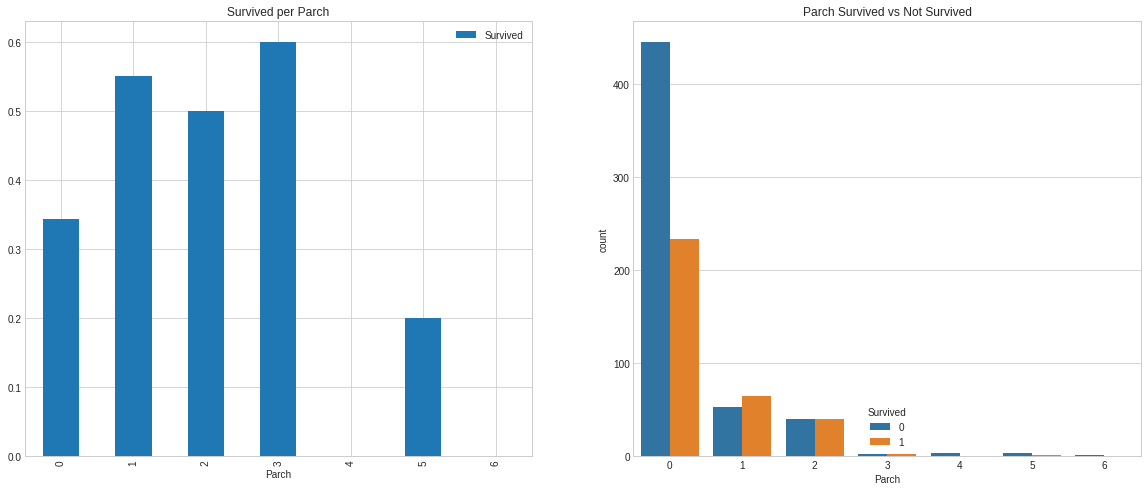

In [57]:
bag('Parch','Survived','Survived per Parch','Parch Survived vs Not Survived') 

In [58]:
pd.crosstab([temp.Family,temp.Survived],temp.Pclass,margins=True).style.background_gradient(cmap='summer_r')

### Task 5.3 - "Ticket"분석

* Ticket의 형태를 보겠습니다.

In [59]:
temp.Ticket.head(n=20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

* 도무지 감이 안 잡히는 배열입니다.
* 빈칸이 없는지 보겠습니다.

In [60]:
temp.Ticket.isnull().any()

False

* 티켓에서 영문있는 것과 숫자만 있는 것을 따봅니다.(숫자만 있는 것은 X로 하겠습니다.)

In [61]:
temp['Initick'] = 0
for s in temp:
    temp['Initick']=temp.Ticket.str.extract('^([A-Za-z]+)')
for s in temp:
    temp.loc[(temp.Initick.isnull()),'Initick']='X'
temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,Newage,Age_Range,Gender,Agroup,Alone,Family,Initick
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,22.0,"(21.0, 23.0]",m2,21,0,2,A
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,38.0,"(33.0, 39.0]",w1,36,0,2,PC
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,26.0,"(23.0, 26.0]",w2,24,1,1,STON
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,35.0,"(33.0, 39.0]",w1,36,0,2,X
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,35.0,"(33.0, 39.0]",m2,36,1,1,X


In [62]:
temp.groupby(['Initick'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Initick,
A,0.0689655
AQ,nan
C,0.454545
CA,0.0714286
F,0.666667
Fa,0
LINE,0.25
LP,nan
P,0.5


*  이 것도 함수로 만들어 놓죠

In [63]:
def groupmean(a,b):
  return temp.groupby([a])[b].mean().to_frame().style.background_gradient(cmap='summer_r')

groupmean('Initick', 'Survived')

,Survived
Initick,
A,0.0689655
AQ,nan
C,0.454545
CA,0.0714286
F,0.666667
Fa,0
LINE,0.25
LP,nan
P,0.5


* x를 그룹별로 보겠습니다.



In [64]:
pd.crosstab([temp.Pclass,temp.Survived],temp.Initick == 'X',margins=True).style.background_gradient(cmap='summer_r')

In [0]:
train['Tgroup'] = 0

temp['Tgroup'] = 0

temp.loc[(temp['Initick']=='X')& (temp['Pclass']==1),'Tgroup']= 1
temp.loc[(temp['Initick']=='X')& (temp['Pclass']==2),'Tgroup']= 2
temp.loc[(temp['Initick']=='X')& (temp['Pclass']==3),'Tgroup']= 3
temp.loc[(temp['Initick']=='Fa'),'Tgroup']= 3
temp.loc[(temp['Initick']=='SCO'),'Tgroup']= 4
temp.loc[(temp['Initick']=='A'),'Tgroup']= 5
temp.loc[(temp['Initick']=='CA'),'Tgroup']= 6
temp.loc[(temp['Initick']=='W'),'Tgroup']= 7
temp.loc[(temp['Initick']=='S'),'Tgroup']= 8
temp.loc[(temp['Initick']=='SOTON'),'Tgroup']= 9
temp.loc[(temp['Initick']=='LINE'),'Tgroup']= 10
temp.loc[(temp['Initick']=='STON'),'Tgroup']= 11
temp.loc[(temp['Initick']=='C'),'Tgroup']= 12
temp.loc[(temp['Initick']=='P'),'Tgroup']= 13
temp.loc[(temp['Initick']=='WE'),'Tgroup']= 14
temp.loc[(temp['Initick']=='SC'),'Tgroup']= 15
temp.loc[(temp['Initick']=='F'),'Tgroup']= 16
temp.loc[(temp['Initick']=='PP'),'Tgroup']= 17
temp.loc[(temp['Initick']=='PC'),'Tgroup']= 17
temp.loc[(temp['Initick']=='SO'),'Tgroup']= 18
temp.loc[(temp['Initick']=='SW'),'Tgroup']= 19


In [66]:
groupmean('Tgroup', 'Survived')

,Survived
Tgroup,
0,nan
1,0.631579
2,0.480315
3,0.253264
4,0
5,0.0689655
6,0.0714286
7,0.0909091
8,0.142857


### Task 5.4 - "Fare" 분석 

In [67]:
print('Highest Fare was:',temp['Fare'].max())
print('Lowest Fare was:',temp['Fare'].min())
print('Average Fare was:',temp['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 33.2954792813456


흠...공짜표도 있었군요

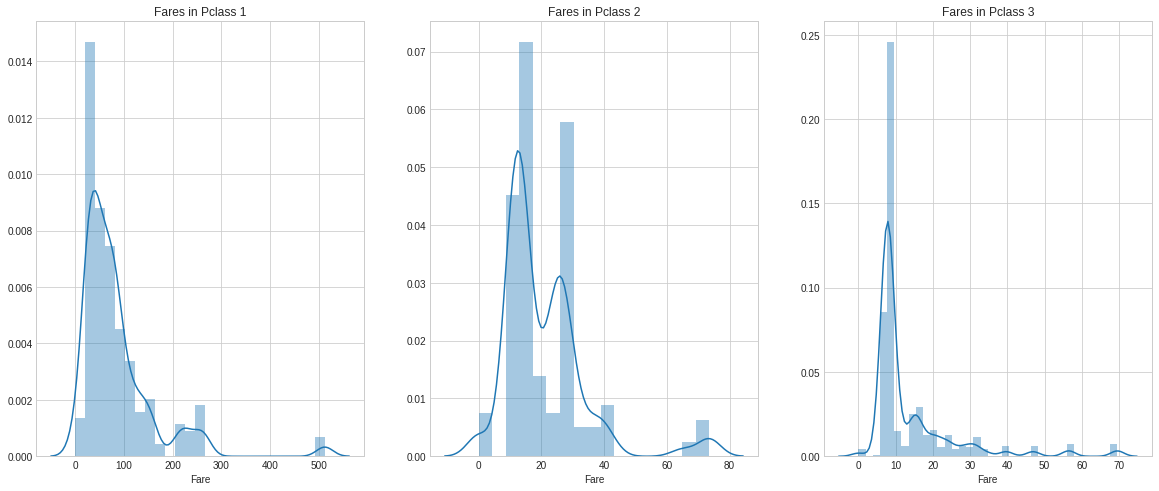

In [68]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train[train['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train[train['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train[train['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

* Pclass1의 승객 요금에는 큰 분포가있는 것으로 보이며 불연속 값으로 변환 할 수 있습니다.

* Fare를 그룹으로 나누어 놓겠습니다.
* qcut을 활용하면 원하는 조각으로 데이터를 나누어 줍니다.

In [69]:
temp['Fare_Range']=pd.qcut(train['Fare'],10)
groupmean('Fare_Range', 'Fare')

,Fare
Fare_Range,
"(-0.001, 7.55]",14.9247
"(7.55, 7.854]",16.4104
"(7.854, 8.05]",12.918
"(8.05, 10.5]",17.7926
"(10.5, 14.454]",20.08
"(14.454, 21.679]",27.2568
"(21.679, 27.0]",33.1352
"(27.0, 39.688]",32.1387
"(39.688, 77.958]",52.436


* * Fare를 그룹화 시킵니다. Fgroup이라고 이름 짓겠습니다.

7.125이하 -> 5.0

7.9 이하 --> 7.5

8.03 이하  --> 8.0

10.5 미만 --> 9.5

23 미만 --> 16.0

27.8 이하 --> 25.5

51 이하 --> 38

73.5 이하 --> 62

73.5 초과 --> 100


In [0]:
temp['Fgroup']=0

temp.loc[temp['Fare']<= 7.125,'Fgroup']=5.0
temp.loc[(temp['Fare']>7.125)&(temp['Fare']<=7.9),'Fgroup']= 7.5
temp.loc[(temp['Fare']>7.9)&(temp['Fare']<=8.03),'Fgroup']= 8.0
temp.loc[(temp['Fare']>8.03)&(temp['Fare']<10.5),'Fgroup']= 9.5
temp.loc[(temp['Fare']>=10.5)&(temp['Fare']<23.0),'Fgroup']= 16.0
temp.loc[(temp['Fare']>=23.0)&(temp['Fare']<=27.8),'Fgroup']= 25.5
temp.loc[(temp['Fare']>27.8)&(temp['Fare']<=51.0),'Fgroup']= 38.0
temp.loc[(temp['Fare']>51.0)&(temp['Fare']<=73.5),'Fgroup']= 62.0
temp.loc[temp['Fare']>73.5,'Fgroup']= 100.0

In [71]:
temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,Newage,Age_Range,Gender,Agroup,Alone,Family,Initick,Tgroup,Fare_Range,Fgroup
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,22.0,"(21.0, 23.0]",m2,21,0,2,A,5,"(-0.001, 7.55]",7.5
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,38.0,"(33.0, 39.0]",w1,36,0,2,PC,17,"(39.688, 77.958]",62.0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,26.0,"(23.0, 26.0]",w2,24,1,1,STON,11,"(7.854, 8.05]",8.0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,35.0,"(33.0, 39.0]",w1,36,0,2,X,1,"(39.688, 77.958]",62.0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,35.0,"(33.0, 39.0]",m2,36,1,1,X,3,"(7.854, 8.05]",9.5


### Taks 5.5 - "Cabin" 분석

* cabin 의 위치에 따라 달라지는 것이 있는지 보겠습니다.

In [72]:
temp.Cabin.value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
C22 C26            4
F2                 4
                  ..
D40                1
D47                1
E38                1
D56                1
E12                1
Name: Cabin, Length: 186, dtype: int64

In [73]:
temp.Cabin.isnull().sum()

1014

* 빈칸이 무척 많습니다.

* Cabin에 비어 있는 것이 많아 이를 다른 분류로 일단 잡고
기존 것은 이니셜로 분류합니다.
* 빈 것은 X로 구분하려는데 이 또한 1,2,3 Pclass와 연동될 것 같으니 비어있고 1등급은 X, 2등급은 Y, 3등급은 Z로 하겠습니다.

In [0]:
temp['Inicab'] = 0
for i in temp:
    temp['Inicab']=temp.Cabin.str.extract('^([A-Za-z]+)')
    temp.loc[((temp.Cabin.isnull()) & (temp.Pclass.values == 1 )),'Inicab']='X'
    temp.loc[((temp.Cabin.isnull()) & (temp.Pclass.values == 2 )),'Inicab']='Y'
    temp.loc[((temp.Cabin.isnull()) & (temp.Pclass.values == 3 )),'Inicab']='Z'


In [75]:
temp.head(n=20)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,Newage,Age_Range,Gender,Agroup,Alone,Family,Initick,Tgroup,Fare_Range,Fgroup,Inicab
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,22.0,"(21.0, 23.0]",m2,21,0,2,A,5,"(-0.001, 7.55]",7.5,Z
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,38.0,"(33.0, 39.0]",w1,36,0,2,PC,17,"(39.688, 77.958]",62.0,C
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,26.0,"(23.0, 26.0]",w2,24,1,1,STON,11,"(7.854, 8.05]",8.0,Z
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,35.0,"(33.0, 39.0]",w1,36,0,2,X,1,"(39.688, 77.958]",62.0,C
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,35.0,"(33.0, 39.0]",m2,36,1,1,X,3,"(7.854, 8.05]",9.5,Z
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,Mr,32.0,"(30.0, 32.0]",m2,31,1,1,X,3,"(8.05, 10.5]",9.5,Z
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,Mr,54.0,"(48.0, 80.0]",m1,60,1,1,X,1,"(39.688, 77.958]",62.0,E
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,Master,2.0,"(0.169, 16.0]",m2,2,0,5,X,3,"(14.454, 21.679]",16.0,Z
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,Mrs,27.0,"(26.0, 30.0]",w2,28,0,3,X,3,"(10.5, 14.454]",16.0,Z
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Mrs,14.0,"(0.169, 16.0]",w2,13,0,2,X,2,"(27.0, 39.688]",38.0,Y


In [76]:
temp.Inicab.value_counts()

Z    693
Y    254
C     94
X     67
B     65
D     46
E     41
A     22
F     21
G      5
T      1
Name: Inicab, dtype: int64

In [0]:
temp['Inicab'].replace(['A','B', 'C', 'D', 'E', 'F', 'G','T', 'X', 'Y', 'Z'],[1,2,3,4,5,6,7,8,9,10,11],inplace=True)

In [78]:
temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,Newage,Age_Range,Gender,Agroup,Alone,Family,Initick,Tgroup,Fare_Range,Fgroup,Inicab
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,22.0,"(21.0, 23.0]",m2,21,0,2,A,5,"(-0.001, 7.55]",7.5,11
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,38.0,"(33.0, 39.0]",w1,36,0,2,PC,17,"(39.688, 77.958]",62.0,3
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,26.0,"(23.0, 26.0]",w2,24,1,1,STON,11,"(7.854, 8.05]",8.0,11
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,35.0,"(33.0, 39.0]",w1,36,0,2,X,1,"(39.688, 77.958]",62.0,3
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,35.0,"(33.0, 39.0]",m2,36,1,1,X,3,"(7.854, 8.05]",9.5,11


### Task 5.6 - "Embarked" 분석

In [79]:
pd.crosstab([temp.Embarked,temp.Pclass],[temp.Sex,temp.Survived],margins=True).style.background_gradient(cmap='summer_r')


* 승선 장소 별로 생존 확률

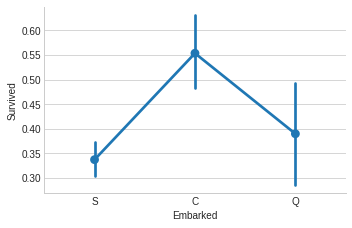

In [80]:
sns.factorplot('Embarked','Survived',data=temp)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

* 포트 C의 생존 가능성은 0.55 정도이며 S는 가장 낮습니다.

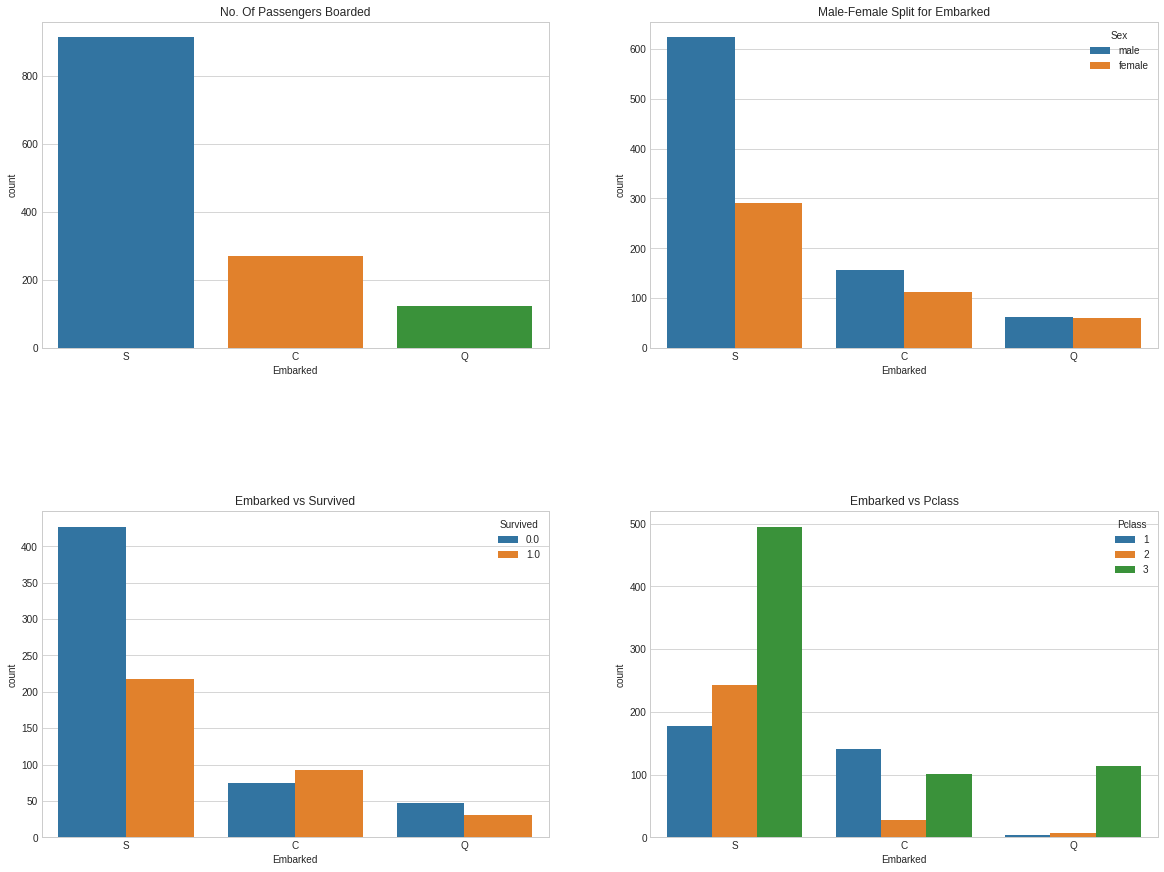

In [81]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=temp,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=temp,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=temp,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=temp,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

* 관찰 :
1) S에서 탑승 최대. 대다수는 Pclass3

2) C의 승객들은 많은 비율이 살아남았습니다. 그 이유는 Pclass1 및 Pclass2 승객이 많아서 일 것입니다

3) Embark S는 대부분의 부자들이 탑승한 항구지만 생존 가능성은 낮습니다. Pclass3의 승객도 많았습니다. 

4) 포트 Q는 승객의 거의 95 %가 Pclass3

* 빈칸이 두개 있는데 보겠습니다.

In [82]:
temp.loc[(temp.Embarked.isnull())]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,Newage,Age_Range,Gender,Agroup,Alone,Family,Initick,Tgroup,Fare_Range,Fgroup,Inicab
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Miss,38.0,"(33.0, 39.0]",w1,36,1,1,X,1,"(77.958, 512.329]",100.0,2
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Mrs,62.0,"(48.0, 80.0]",w1,60,1,1,X,1,"(77.958, 512.329]",100.0,2


* 두 사람의 티켓 번호가 같습니다.
* 혹시 같은 티켓 번호가 있는 다른 사람이 있는지 봅니다.

In [83]:
temp.loc[(temp.Ticket == '113572')]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,Newage,Age_Range,Gender,Agroup,Alone,Family,Initick,Tgroup,Fare_Range,Fgroup,Inicab
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Miss,38.0,"(33.0, 39.0]",w1,36,1,1,X,1,"(77.958, 512.329]",100.0,2
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Mrs,62.0,"(48.0, 80.0]",w1,60,1,1,X,1,"(77.958, 512.329]",100.0,2


* 가장 비슷한 번호를 찾아 보겠습니다.

In [84]:
temp.sort_values(['Ticket'], ascending = True)[35:45]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,Newage,Age_Range,Gender,Agroup,Alone,Family,Initick,Tgroup,Fare_Range,Fgroup,Inicab
711,NaN,C124,S,26.55,"Klaber, Mr. Herman",0,712,1,male,0,0.0,113028,Mr,32.0,"(30.0, 32.0]",m1,31,1,1,X,1,"(21.679, 27.0]",25.5,3
215,42.0,B11,S,42.50,"Head, Mr. Christopher",0,1107,1,male,0,NaN,113038,Mr,42.0,"(39.0, 48.0]",m1,45,1,1,X,1,"(77.958, 512.329]",38.0,2
331,45.5,C124,S,28.50,"Partner, Mr. Austen",0,332,1,male,0,0.0,113043,Mr,45.5,"(39.0, 48.0]",m1,45,1,1,X,1,"(27.0, 39.688]",38.0,3
355,50.0,E60,S,26.00,"Julian, Mr. Henry Forbes",0,1247,1,male,0,NaN,113044,Mr,50.0,"(48.0, 80.0]",m1,45,1,1,X,1,"(8.05, 10.5]",25.5,5
536,45.0,B38,S,26.55,"Butt, Major. Archibald Willingham",0,537,1,male,0,0.0,113050,Major,45.0,"(39.0, 48.0]",m1,45,1,1,X,1,"(21.679, 27.0]",25.5,2
452,30.0,C111,C,27.75,"Foreman, Mr. Benjamin Laventall",0,453,1,male,0,0.0,113051,Mr,30.0,"(26.0, 30.0]",m1,28,1,1,X,1,"(27.0, 39.688]",25.5,3
28,41.0,A21,S,30.50,"Brady, Mr. John Bertram",0,920,1,male,0,NaN,113054,Mr,41.0,"(39.0, 48.0]",m1,45,1,1,X,1,"(7.854, 8.05]",38.0,1
857,51.0,E17,S,26.55,"Daly, Mr. Peter Denis",0,858,1,male,0,1.0,113055,Mr,51.0,"(48.0, 80.0]",m1,45,1,1,X,1,"(21.679, 27.0]",25.5,5
284,NaN,A19,S,26.00,"Smith, Mr. Richard William",0,285,1,male,0,0.0,113056,Mr,32.0,"(30.0, 32.0]",m1,31,1,1,X,1,"(21.679, 27.0]",25.5,1
83,28.0,NaN,S,47.10,"Carrau, Mr. Francisco M",0,84,1,male,0,0.0,113059,Mr,28.0,"(26.0, 30.0]",m1,28,1,1,X,1,"(39.688, 77.958]",38.0,9


* 앞 뒤로 모두 S이고 Pclass도 모두 1인 것으로 봐서 S일 가능성이 큽니다.

In [0]:
temp.loc[(train.Embarked.isnull()),'Embarked']='S'

In [86]:
temp.sort_values(['Ticket'], ascending = True)[35:45]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,Newage,Age_Range,Gender,Agroup,Alone,Family,Initick,Tgroup,Fare_Range,Fgroup,Inicab
711,NaN,C124,S,26.55,"Klaber, Mr. Herman",0,712,1,male,0,0.0,113028,Mr,32.0,"(30.0, 32.0]",m1,31,1,1,X,1,"(21.679, 27.0]",25.5,3
215,42.0,B11,S,42.50,"Head, Mr. Christopher",0,1107,1,male,0,NaN,113038,Mr,42.0,"(39.0, 48.0]",m1,45,1,1,X,1,"(77.958, 512.329]",38.0,2
331,45.5,C124,S,28.50,"Partner, Mr. Austen",0,332,1,male,0,0.0,113043,Mr,45.5,"(39.0, 48.0]",m1,45,1,1,X,1,"(27.0, 39.688]",38.0,3
355,50.0,E60,S,26.00,"Julian, Mr. Henry Forbes",0,1247,1,male,0,NaN,113044,Mr,50.0,"(48.0, 80.0]",m1,45,1,1,X,1,"(8.05, 10.5]",25.5,5
536,45.0,B38,S,26.55,"Butt, Major. Archibald Willingham",0,537,1,male,0,0.0,113050,Major,45.0,"(39.0, 48.0]",m1,45,1,1,X,1,"(21.679, 27.0]",25.5,2
452,30.0,C111,C,27.75,"Foreman, Mr. Benjamin Laventall",0,453,1,male,0,0.0,113051,Mr,30.0,"(26.0, 30.0]",m1,28,1,1,X,1,"(27.0, 39.688]",25.5,3
28,41.0,A21,S,30.50,"Brady, Mr. John Bertram",0,920,1,male,0,NaN,113054,Mr,41.0,"(39.0, 48.0]",m1,45,1,1,X,1,"(7.854, 8.05]",38.0,1
857,51.0,E17,S,26.55,"Daly, Mr. Peter Denis",0,858,1,male,0,1.0,113055,Mr,51.0,"(48.0, 80.0]",m1,45,1,1,X,1,"(21.679, 27.0]",25.5,5
284,NaN,A19,S,26.00,"Smith, Mr. Richard William",0,285,1,male,0,0.0,113056,Mr,32.0,"(30.0, 32.0]",m1,31,1,1,X,1,"(21.679, 27.0]",25.5,1
83,28.0,NaN,S,47.10,"Carrau, Mr. Francisco M",0,84,1,male,0,0.0,113059,Mr,28.0,"(26.0, 30.0]",m1,28,1,1,X,1,"(39.688, 77.958]",38.0,9


## Task 6  - string을 수치로 바꾸기

* 이제 문자로 된 항목들 수치로 바꾸어 봅니다.

In [87]:
temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,Newage,Age_Range,Gender,Agroup,Alone,Family,Initick,Tgroup,Fare_Range,Fgroup,Inicab
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,22.0,"(21.0, 23.0]",m2,21,0,2,A,5,"(-0.001, 7.55]",7.5,11
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,38.0,"(33.0, 39.0]",w1,36,0,2,PC,17,"(39.688, 77.958]",62.0,3
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,26.0,"(23.0, 26.0]",w2,24,1,1,STON,11,"(7.854, 8.05]",8.0,11
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,35.0,"(33.0, 39.0]",w1,36,0,2,X,1,"(39.688, 77.958]",62.0,3
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,35.0,"(33.0, 39.0]",m2,36,1,1,X,3,"(7.854, 8.05]",9.5,11


In [88]:
temp.groupby('Initial').Survived.mean()

Initial
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dona             NaN
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

In [0]:
temp['Initial'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dona' , 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',  'Miss'  ,'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'],[1, 2, 3, 4, 5, 6, 4, 3, 2, 8, 9, 3, 3, 4, 5, 3, 1, 3 ],inplace=True)

In [90]:
temp.groupby('Initial').Survived.mean()

Initial
1    0.000000
2    0.500000
3    1.000000
4    0.156069
5    0.792000
6    0.428571
8    0.575000
9    0.697802
Name: Survived, dtype: float64

In [91]:
temp.groupby('Embarked').Survived.mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [0]:
temp["Embarked"].replace(['C','Q', 'S'], [1,2,3], inplace =True )

In [0]:
temp["Gender"].replace(['baby','m1', 'm2', 'old', 'w1', 'w2'], [1,2,3,4,5,6], inplace =True )

In [94]:
temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,Newage,Age_Range,Gender,Agroup,Alone,Family,Initick,Tgroup,Fare_Range,Fgroup,Inicab
0,22.0,NaN,3,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,4,22.0,"(21.0, 23.0]",3,21,0,2,A,5,"(-0.001, 7.55]",7.5,11
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,5,38.0,"(33.0, 39.0]",5,36,0,2,PC,17,"(39.688, 77.958]",62.0,3
2,26.0,NaN,3,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,9,26.0,"(23.0, 26.0]",6,24,1,1,STON,11,"(7.854, 8.05]",8.0,11
3,35.0,C123,3,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,5,35.0,"(33.0, 39.0]",5,36,0,2,X,1,"(39.688, 77.958]",62.0,3
4,35.0,NaN,3,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,4,35.0,"(33.0, 39.0]",3,36,1,1,X,3,"(7.854, 8.05]",9.5,11


*이제 빈 것이 뭐가 있는지 보겠습니다.

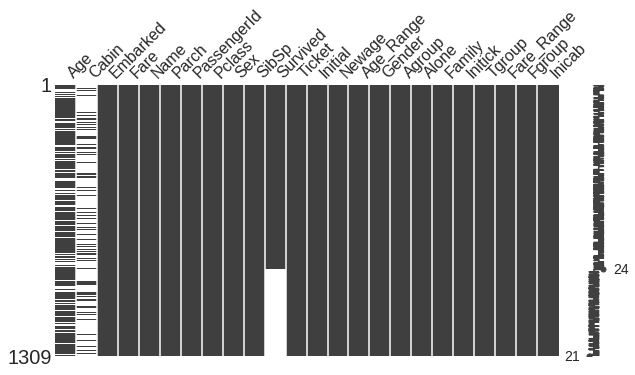

In [95]:
missingno.matrix(temp, figsize = (10,5))

* 이제 데이터 분석을 위해 새로운 데이터프레임을 만듭니다.

In [0]:
df = pd.DataFrame()

In [97]:
def sub(a,b):
  df[a]=temp[b]

sub('Pclass', 'Pclass')
sub('Name', 'Initial')
sub('Sex', 'Gender')
sub('Age', 'Agroup')
sub('Alone', 'Alone')
sub('Family', 'Family')
sub('Ticket', 'Tgroup')
sub('Fare', 'Fgroup')
sub('Cabin', 'Inicab')
sub('Embarked', 'Embarked')


df.head()

,Pclass,Name,Sex,Age,Alone,Family,Ticket,Fare,Cabin,Embarked
0,3,4,3,21,0,2,5,7.5,11,3
1,1,5,5,36,0,2,17,62.0,3,1
2,3,9,6,24,1,1,11,8.0,11,3
3,1,5,5,36,0,2,1,62.0,3,3
4,3,4,3,36,1,1,3,9.5,11,3


In [98]:
df.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
Alone       0
Family      0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [99]:
len(df)

1309

## Task 7 새로운 형태로 바꾸기

* 자 이제는 수치화 했으니 새로운 항목으로 정리하겠습니다.
* 타이타닉은 분류의 문제입니다. 주어진 데이터에서 어떻게 분류하는가가 중요하지요.
* 우선 기존 항목을 정리합니다.

In [137]:
df.head()

,Pclass,Name,Sex,Age,Alone,Family,Ticket,Fare,Cabin,Embarked
0,3,4,3,21,0,2,5,7.5,11,3
1,1,5,5,36,0,2,17,62.0,3,1
2,3,9,6,24,1,1,11,8.0,11,3
3,1,5,5,36,0,2,1,62.0,3,3
4,3,4,3,36,1,1,3,9.5,11,3


In [0]:
score = df.copy()

In [139]:
len(score)

1309

In [0]:
score['Survived'] = temp['Survived']

In [0]:
score['Score'] = 0

In [0]:
st = score[:ntrain]

In [168]:
def see(a):
  return st.groupby(a).Survived.mean()

see('Pclass')

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [169]:
score['s1'] = 0

for i in score:
   score.loc[((score.Pclass.values == 1 )),'s1']=35
   score.loc[((score.Pclass.values == 2 )),'s1']=20
   score.loc[((score.Pclass.values == 3 )),'s1']=-20

score.head()

,Pclass,Name,Sex,Age,Alone,Family,Ticket,Fare,Cabin,Embarked,Survived,Score,s1,s2,s3,s4,s5,s6,s7,s8,s9
0,3,4,3,21,0,2,5,7.5,11,3,0.0,0,-20,-90,-70,5,25,-100,-60,-60,-10
1,1,5,5,36,0,2,17,62.0,3,1,1.0,0,35,60,100,25,25,40,30,30,30
2,3,9,6,24,1,1,11,8.0,11,3,1.0,0,-20,45,30,0,-20,5,10,-60,-10
3,1,5,5,36,0,2,1,62.0,3,3,1.0,0,35,60,100,25,25,30,30,30,-10
4,3,4,3,36,1,1,3,9.5,11,3,0.0,0,-20,-90,-70,25,-20,-40,-80,-60,-10


In [170]:
see('Name')

Name
1    0.000000
2    0.500000
3    1.000000
4    0.156069
5    0.792000
6    0.428571
8    0.575000
9    0.697802
Name: Survived, dtype: float64

In [171]:
score['s2'] = 0

for i in score:
   score.loc[((score.Name.values == 1 )),'s2']=-1000
   score.loc[((score.Name.values == 2 )),'s2']=25
   score.loc[((score.Name.values == 3 )),'s2']=1000
   score.loc[((score.Name.values == 4 )),'s2']=-80
   score.loc[((score.Name.values == 5 )),'s2']=60
   score.loc[((score.Name.values == 6 )),'s2']=20
   score.loc[((score.Name.values == 8 )),'s2']=25
   score.loc[((score.Name.values == 9 )),'s2']=40

score.head()

,Pclass,Name,Sex,Age,Alone,Family,Ticket,Fare,Cabin,Embarked,Survived,Score,s1,s2,s3,s4,s5,s6,s7,s8,s9
0,3,4,3,21,0,2,5,7.5,11,3,0.0,0,-20,-80,-70,5,25,-100,-60,-60,-10
1,1,5,5,36,0,2,17,62.0,3,1,1.0,0,35,60,100,25,25,40,30,30,30
2,3,9,6,24,1,1,11,8.0,11,3,1.0,0,-20,40,30,0,-20,5,10,-60,-10
3,1,5,5,36,0,2,1,62.0,3,3,1.0,0,35,60,100,25,25,30,30,30,-10
4,3,4,3,36,1,1,3,9.5,11,3,0.0,0,-20,-80,-70,25,-20,-40,-80,-60,-10


In [172]:
see('Sex')

Sex
1    0.857143
2    0.358333
3    0.127803
4    1.000000
5    0.968085
6    0.638889
Name: Survived, dtype: float64

In [173]:
score['s3'] = 0

for i in score:
   score.loc[((score.Sex.values == 1 )),'s3']= 80
   score.loc[((score.Sex.values == 2 )),'s3']=-10
   score.loc[((score.Sex.values == 3 )),'s3']=-80
   score.loc[((score.Sex.values == 4 )),'s3']=1000
   score.loc[((score.Sex.values == 5 )),'s3']=100
   score.loc[((score.Sex.values == 6 )),'s3']=30


score.head()

,Pclass,Name,Sex,Age,Alone,Family,Ticket,Fare,Cabin,Embarked,Survived,Score,s1,s2,s3,s4,s5,s6,s7,s8,s9
0,3,4,3,21,0,2,5,7.5,11,3,0.0,0,-20,-80,-80,5,25,-100,-60,-60,-10
1,1,5,5,36,0,2,17,62.0,3,1,1.0,0,35,60,100,25,25,40,30,30,30
2,3,9,6,24,1,1,11,8.0,11,3,1.0,0,-20,40,30,0,-20,5,10,-60,-10
3,1,5,5,36,0,2,1,62.0,3,3,1.0,0,35,60,100,25,25,30,30,30,-10
4,3,4,3,36,1,1,3,9.5,11,3,0.0,0,-20,-80,-80,25,-20,-40,-80,-60,-10


In [174]:
see('Age')

Age
1     1.000000
2     0.565217
7     0.526316
13    0.500000
16    0.457143
18    0.318182
21    0.431818
24    0.363636
28    0.400000
31    0.198718
33    0.406250
36    0.552632
45    0.385827
60    0.320000
78    1.000000
Name: Survived, dtype: float64

In [175]:
score['s4'] = 0

for i in score:
   score.loc[((score.Age.values == 1 )),'s4']=1000
   score.loc[((score.Age.values == 2 )),'s4']=25
   score.loc[((score.Age.values == 7 )),'s4']=25
   score.loc[((score.Age.values == 13 )),'s4']=20
   score.loc[((score.Age.values == 16 )),'s4']=5
   score.loc[((score.Age.values == 18 )),'s4']=-10
   score.loc[((score.Age.values == 21 )),'s4']=5
   score.loc[((score.Age.values == 24 )),'s4']=0
   score.loc[((score.Age.values == 28 )),'s4']= 0
   score.loc[((score.Age.values == 31 )),'s4']=-80
   score.loc[((score.Age.values == 33 )),'s4']=0
   score.loc[((score.Age.values == 36 )),'s4']=25
   score.loc[((score.Age.values == 45 )),'s4']=0
   score.loc[((score.Age.values == 60 )),'s4']=-10
   score.loc[((score.Age.values == 78 )),'s4']=1000

score.head()


,Pclass,Name,Sex,Age,Alone,Family,Ticket,Fare,Cabin,Embarked,Survived,Score,s1,s2,s3,s4,s5,s6,s7,s8,s9
0,3,4,3,21,0,2,5,7.5,11,3,0.0,0,-20,-80,-80,5,25,-100,-60,-60,-10
1,1,5,5,36,0,2,17,62.0,3,1,1.0,0,35,60,100,25,25,40,30,30,30
2,3,9,6,24,1,1,11,8.0,11,3,1.0,0,-20,40,30,0,-20,5,10,-60,-10
3,1,5,5,36,0,2,1,62.0,3,3,1.0,0,35,60,100,25,25,30,30,30,-10
4,3,4,3,36,1,1,3,9.5,11,3,0.0,0,-20,-80,-80,25,-20,-40,-80,-60,-10


In [176]:
see('Family')

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [177]:
score['s5'] = 0

for i in score:
   score.loc[((score.Family.values == 1 )),'s5']=-20
   score.loc[((score.Family.values == 2 )),'s5']=25
   score.loc[((score.Family.values == 3 )),'s5']=25
   score.loc[((score.Family.values == 4 )),'s5']=50
   score.loc[((score.Family.values == 5 )),'s5']=-40
   score.loc[((score.Family.values == 6 )),'s5']=-80
   score.loc[((score.Family.values == 7 )),'s5']=-10
   score.loc[((score.Family.values >= 8 )),'s5']=-1000


score.head()


,Pclass,Name,Sex,Age,Alone,Family,Ticket,Fare,Cabin,Embarked,Survived,Score,s1,s2,s3,s4,s5,s6,s7,s8,s9
0,3,4,3,21,0,2,5,7.5,11,3,0.0,0,-20,-80,-80,5,25,-100,-60,-60,-10
1,1,5,5,36,0,2,17,62.0,3,1,1.0,0,35,60,100,25,25,40,30,30,30
2,3,9,6,24,1,1,11,8.0,11,3,1.0,0,-20,40,30,0,-20,5,10,-60,-10
3,1,5,5,36,0,2,1,62.0,3,3,1.0,0,35,60,100,25,25,30,30,30,-10
4,3,4,3,36,1,1,3,9.5,11,3,0.0,0,-20,-80,-80,25,-20,-40,-80,-60,-10


In [178]:
see('Ticket')

Ticket
1     0.631579
2     0.480315
3     0.253264
4     0.000000
5     0.068966
6     0.071429
7     0.090909
8     0.142857
9     0.117647
10    0.250000
11    0.444444
12    0.454545
13    0.500000
14    0.500000
15    0.538462
16    0.666667
17    0.650794
18    1.000000
19    1.000000
Name: Survived, dtype: float64

In [179]:
score['s6'] = 0

for i in score:
   score.loc[((score.Ticket.values == 1 )),'s6']=30
   score.loc[((score.Ticket.values == 2 )),'s6']=15
   score.loc[((score.Ticket.values == 3 )),'s6']=-40
   score.loc[((score.Ticket.values == 4 )),'s6']=-1000
   score.loc[((score.Ticket.values == 5 )),'s6']=-100
   score.loc[((score.Ticket.values == 6 )),'s6']=-100
   score.loc[((score.Ticket.values == 7 )),'s6']=-100
   score.loc[((score.Ticket.values == 8 )),'s6']=-80
   score.loc[((score.Ticket.values == 9 )),'s6']= -80
   score.loc[((score.Ticket.values == 10 )),'s6']=-60
   score.loc[((score.Ticket.values == 11 )),'s6']=5
   score.loc[((score.Ticket.values == 12 )),'s6']=5
   score.loc[((score.Ticket.values == 13 )),'s6']=25
   score.loc[((score.Ticket.values == 14 )),'s6']=25
   score.loc[((score.Ticket.values == 15 )),'s6']=25
   score.loc[((score.Ticket.values == 16 )),'s6']=40
   score.loc[((score.Ticket.values == 17 )),'s6']=40
   score.loc[((score.Ticket.values == 18 )),'s6']=1000
   score.loc[((score.Ticket.values == 19 )),'s6']=1000


score.head()

,Pclass,Name,Sex,Age,Alone,Family,Ticket,Fare,Cabin,Embarked,Survived,Score,s1,s2,s3,s4,s5,s6,s7,s8,s9
0,3,4,3,21,0,2,5,7.5,11,3,0.0,0,-20,-80,-80,5,25,-100,-60,-60,-10
1,1,5,5,36,0,2,17,62.0,3,1,1.0,0,35,60,100,25,25,40,30,30,30
2,3,9,6,24,1,1,11,8.0,11,3,1.0,0,-20,40,30,0,-20,5,10,-60,-10
3,1,5,5,36,0,2,1,62.0,3,3,1.0,0,35,60,100,25,25,30,30,30,-10
4,3,4,3,36,1,1,3,9.5,11,3,0.0,0,-20,-80,-80,25,-20,-40,-80,-60,-10


In [180]:
see('Fare')

Fare
5.0      0.047619
7.5      0.232044
8.0      0.473684
9.5      0.144330
16.0     0.425000
25.5     0.489362
38.0     0.353535
62.0     0.564516
100.0    0.762887
Name: Survived, dtype: float64

In [181]:
score['s7'] = 0

for i in score:
   score.loc[((score.Fare.values <= 5.0 )),'s7']=-100
   score.loc[((score.Fare.values == 7.5 )),'s7']=-60
   score.loc[((score.Fare.values == 8.0 )),'s7']=10
   score.loc[((score.Fare.values == 9.5)),'s7']=-80
   score.loc[((score.Fare.values == 16.0)),'s7']=5
   score.loc[((score.Fare.values == 25.5)),'s7']=10
   score.loc[((score.Fare.values == 38.0)),'s7']=-5
   score.loc[((score.Fare.values == 62.0)),'s7']=30
   score.loc[((score.Fare.values >= 100)),'s7']=50

score.head()

,Pclass,Name,Sex,Age,Alone,Family,Ticket,Fare,Cabin,Embarked,Survived,Score,s1,s2,s3,s4,s5,s6,s7,s8,s9
0,3,4,3,21,0,2,5,7.5,11,3,0.0,0,-20,-80,-80,5,25,-100,-60,-60,-10
1,1,5,5,36,0,2,17,62.0,3,1,1.0,0,35,60,100,25,25,40,30,30,30
2,3,9,6,24,1,1,11,8.0,11,3,1.0,0,-20,40,30,0,-20,5,10,-60,-10
3,1,5,5,36,0,2,1,62.0,3,3,1.0,0,35,60,100,25,25,30,30,30,-10
4,3,4,3,36,1,1,3,9.5,11,3,0.0,0,-20,-80,-80,25,-20,-40,-80,-60,-10


In [182]:
see('Cabin')

Cabin
1     0.466667
2     0.744681
3     0.593220
4     0.757576
5     0.750000
6     0.615385
7     0.500000
8     0.000000
9     0.475000
10    0.440476
11    0.235908
Name: Survived, dtype: float64

In [183]:
score['s8'] = 0

for i in score:
   score.loc[((score.Cabin.values == 1 )),'s8']=10
   score.loc[((score.Cabin.values == 2 )),'s8']=50
   score.loc[((score.Cabin.values == 3 )),'s8']=30
   score.loc[((score.Cabin.values == 4 )),'s8']=50
   score.loc[((score.Cabin.values == 5 )),'s8']=50
   score.loc[((score.Cabin.values == 6 )),'s8']=40
   score.loc[((score.Cabin.values == 7 )),'s8']=25
   score.loc[((score.Cabin.values == 8 )),'s8']=-1000
   score.loc[((score.Cabin.values == 9 )),'s8']= 5
   score.loc[((score.Cabin.values == 10 )),'s8']=5
   score.loc[((score.Cabin.values == 11 )),'s8']=-60



score.head()

,Pclass,Name,Sex,Age,Alone,Family,Ticket,Fare,Cabin,Embarked,Survived,Score,s1,s2,s3,s4,s5,s6,s7,s8,s9
0,3,4,3,21,0,2,5,7.5,11,3,0.0,0,-20,-80,-80,5,25,-100,-60,-60,-10
1,1,5,5,36,0,2,17,62.0,3,1,1.0,0,35,60,100,25,25,40,30,30,30
2,3,9,6,24,1,1,11,8.0,11,3,1.0,0,-20,40,30,0,-20,5,10,-60,-10
3,1,5,5,36,0,2,1,62.0,3,3,1.0,0,35,60,100,25,25,30,30,30,-10
4,3,4,3,36,1,1,3,9.5,11,3,0.0,0,-20,-80,-80,25,-20,-40,-80,-60,-10


In [184]:
see('Embarked')

Embarked
1    0.553571
2    0.389610
3    0.339009
Name: Survived, dtype: float64

In [185]:
score['s9'] = 0

for i in score:
   score.loc[((score.Embarked.values == 1 )),'s9']= 30
   score.loc[((score.Embarked.values == 2 )),'s9']=0
   score.loc[((score.Embarked.values == 3 )),'s9']=-10

score.head()

,Pclass,Name,Sex,Age,Alone,Family,Ticket,Fare,Cabin,Embarked,Survived,Score,s1,s2,s3,s4,s5,s6,s7,s8,s9
0,3,4,3,21,0,2,5,7.5,11,3,0.0,0,-20,-80,-80,5,25,-100,-60,-60,-10
1,1,5,5,36,0,2,17,62.0,3,1,1.0,0,35,60,100,25,25,40,30,30,30
2,3,9,6,24,1,1,11,8.0,11,3,1.0,0,-20,40,30,0,-20,5,10,-60,-10
3,1,5,5,36,0,2,1,62.0,3,3,1.0,0,35,60,100,25,25,30,30,30,-10
4,3,4,3,36,1,1,3,9.5,11,3,0.0,0,-20,-80,-80,25,-20,-40,-80,-60,-10


#### 합? Just for fun


In [0]:
score['Score'] = score['s1'] + score['s2'] + + score['s3']+ score['s4']+ score['s5']+ score['s6']+ score['s7']+ score['s8']+ score['s9']

In [187]:
sf = score[:ntrain]

sf.head()

,Pclass,Name,Sex,Age,Alone,Family,Ticket,Fare,Cabin,Embarked,Survived,Score,s1,s2,s3,s4,s5,s6,s7,s8,s9
0,3,4,3,21,0,2,5,7.5,11,3,0.0,-380,-20,-80,-80,5,25,-100,-60,-60,-10
1,1,5,5,36,0,2,17,62.0,3,1,1.0,375,35,60,100,25,25,40,30,30,30
2,3,9,6,24,1,1,11,8.0,11,3,1.0,-25,-20,40,30,0,-20,5,10,-60,-10
3,1,5,5,36,0,2,1,62.0,3,3,1.0,325,35,60,100,25,25,30,30,30,-10
4,3,4,3,36,1,1,3,9.5,11,3,0.0,-365,-20,-80,-80,25,-20,-40,-80,-60,-10


* 이제 새로운 데이터 프레임을 만듭니다.

In [0]:
df_new = pd.DataFrame()

In [191]:
def ch(a):
  df_new[a] = score[a]

ch('Score')
ch('s1')
ch('s2')
ch('s3')
ch('s4')
ch('s5')
ch('s6')
ch('s7')
ch('s8')
ch('s9')

df_new.head()

,Score,s1,s2,s3,s4,s5,s6,s7,s8,s9
0,-380,-20,-80,-80,5,25,-100,-60,-60,-10
1,375,35,60,100,25,25,40,30,30,30
2,-25,-20,40,30,0,-20,5,10,-60,-10
3,325,35,60,100,25,25,30,30,30,-10
4,-365,-20,-80,-80,25,-20,-40,-80,-60,-10


In [192]:
len(df_new)

1309

## Label Encoding

In [193]:
df_enc = df_new.apply(LabelEncoder().fit_transform)
                          
df_enc.head()

,Score,s1,s2,s3,s4,s5,s6,s7,s8,s9
0,38,0,1,0,3,5,1,2,1,0
1,182,2,5,4,5,5,10,6,5,2
2,103,0,4,2,2,3,6,5,1,0
3,173,2,5,4,5,5,9,6,5,0
4,41,0,1,0,5,3,4,1,1,0


## Task 8 - 머신러닝 모델 만들기

* 자, 이제 머신 러닝 모델을 만들어 보지요.
* 우선 인코딩한 파일을 train과 test로 아까 구분해 놓은 행으로 쪼갭니다

In [0]:
train = df_enc[:ntrain]
test = df_enc[ntrain:]

* 이를 트레인과 테스트 데이터플레임의 x축으로 정의합니다.

In [0]:
X_test = test
X_train = train

* StandardScaler의 기본 개념은 분포가 평균값 0이고 표준 편차가 1이되도록 데이터를 변환한다는 것입니다. 기르고 스케일러를 쓰지 않으면 아래에서 알고리즘을 쓸 때 에러가 발생하기도 합니다. 

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [197]:
X_train

array([[-0.98163689, -0.82737724, -0.78811958, ..., -0.79516666,
        -0.65303145, -0.58595414],
       [ 1.97239115,  1.56610693,  1.61466757, ...,  1.24366354,
         1.25155454,  1.9423032 ],
       [ 0.35177854, -0.82737724,  1.01397078, ...,  0.73395599,
        -0.65303145, -0.58595414],
       ...,
       [ 0.22869404, -0.82737724,  1.01397078, ...,  0.73395599,
        -0.65303145, -0.58595414],
       [ 0.49537713,  1.56610693, -0.78811958, ..., -0.28545911,
         1.25155454,  1.9423032 ],
       [-1.20729181, -0.82737724, -0.78811958, ..., -0.79516666,
        -0.65303145,  0.67817453]])

### 1단계 모델을 만들어 봅니다.

* 자 이제는 11개의 classifier로 모델을 돌려 보겠습니다. 

In [0]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

# Prepare lists
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
scores = []

# Sequentially fit and cross validate all models
for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores.append(acc.mean())

* 클래시파이어는 특정 데이터 포인트에 (범주) 클래스 레이블을 할당하는 데 사용되는 이산 값 함수입니다.
* Random Forest -결정 트리(decision tree)는 말그대로 결정을 내리기 위해 사용하는 트리로, 결정 과정을 간단한 문제들로 이루어진 계층 구조로 나눈다. 간단한 문제에 대해서는 매개변수(예: 모든 노드의 테스트 매개변수, 종단 노드에서 매개변수 등)를 사용자가 직접 설정할 수 있지만, 보다 복잡한 문제의 경우 학습 데이터로부터 트리 구조와 매개변수를 모두 자동으로 학습한다.
랜덤 포레스트의 가장 큰 특징은 랜덤성(randomness)에 의해 트리들이 서로 조금씩 다른 특성을 갖는다는 점이다. 이 특성은 각 트리들의 예측(prediction)들이 비상관화(decorrelation) 되게하며, 결과적으로 일반화(generalization) 성능을 향상시킨다. 또한, 랜덤화(randomization)는 포레스트가 노이즈가 포함된 데이터에 대해서도 강인하게 만들어 준다. 랜덤화는 각 트리들의 훈련 과정에서 진행되며, 랜덤 학습 데이터 추출 방법을 이용한 앙상블 학습법인 배깅(bagging)과 랜덤 노드 최적화(randomized node optimization)가 자주 사용된다. 이 두 가지 방법은 서로 동시에 사용되어 랜덤화 특성을 더욱 증진 시킬 수 있다.
* randome_state =1로 하는 것은 계속 같은 결과로 나오게/ 0으로 하면 매번 달라짐
*  K-neighbors는 쉽게 표현하면 K개의 이웃을 찾습니다.이웃 점의 인접 지표와 거리를 반환합니다.
* Logistic Regression - 종속 변수와 독립 변수 사이의 관계는 미래 예측 모델에 사용될 구체적인 함수로 표현되며 독립적인 변수의 선형 조합을 사용하여 사건의 가능성을 예측하기 위해 통계 기법입니다. 즉 동전의 앞뒷면, 되냐 안 되는냐 이런 종류에 주로 사용됩니다. 회귀란 말이 생경하기 때문에 간단히 말씀 드리면 예를 들어 타이타닉에서 1등석 여성부터 구명보트에 먼저 태웠다면 룰에 따라 1등석 여성은 모두 살아야 하는데, 현실 세계에서는 꼭 케이트윈슬렛처럼 디카프리오 땜에 도로 배로 돌아오거나 아니면 스스로 희생을 택하는 분들 같은 평균값을 벗어나는 일들이 생기기 때문에 본래 모델과의 차이가 발생하게 되어 있습니다. 이러한 차들이 평균적인 수치로 돌아오게 만드는 것이 회귀 모델이라고 생각하시면 됩니다. 설명이 부족하나 초보자들은 그 정도만 이해하시고 나중에 좀 더 이해하시는 것으로 하고 넘어 갑니다.
* XGB는 의사결정 트리를 많이 만들어 이의 예측값을 더해가며 결정하는데 이를 위해 또 잔 하이퍼파라미터를 설정하게 하여 좀 더 성능을 높이는 부스팅 알고리즘입니다.
* 참고로 부스팅은 분류문제에서 잘 못 분류된 것을 재분류하는 것을 반복하여 예측모델을 강화 시키는 것입니다. 
* 또한 배깅이란 것은 여러번의 복원 샘플링을 통해 예측 모델의 분산을 줄여 모델을 강화시키는 방법입니다.
* 또한 보팅이란 말을 많이 들으실텐데 보팅은 하드보팅과 소프트보팅이 있습니다. 하드보팅은 말 그대로 투표한데로 결과를 내는 것이고, 소프트보팅은 가중치를 조절하여 유연하게 투표하는 방식입니다.
* GradientBoosting - 랜덤 포리스트가 많은 트리를 만들어 내서 해결하는 방법을 택한다면 GradientBoosting은 앞에 트리의 오차를 줄여가며 보완하는 방식으로 트리를 만들어 가는 방식이라고 생각하시면 됩니다.
* SVㅡ - Support Vector machine은 분류 할 때 무우 자르듯이 자르는 것이 아니라 마진의 경계선을 주어 제한 조건을 추가한 것이라 생각하시면 됩니다. 남북한의 명확한 경계선 대신 비무장 지대 생각하시면 어떨지....
* ExtraTrees - 랜덤포리스트에서 트리를 무작위로 분할하여 더 많은 트리를 만든 방식이라 생각하시면 됩니다.
* adaboost 알고리즘은 Adaptive Boost의 준말로 데이터를 대충 분류해서 돌린 후 여기서 분류하지 못 하는 오류들에 가중치를 주어 정확도를 높이는 것을 계속 반복하여 신뢰도를 높인다고 생각하시면 됩니다.
* Gaussian Naive Bayes 알고리즘은 특수한 유형의 NB 알고리즘입니다. 기능에 연속 값이있을 때 특히 사용됩니다. 또한 모든 기능이 가우스 분포, 즉 정규 분포를 따르고 있다고 가정합니다.Naive Bayes는 특성들 사이의 독립을 가정하는 베이즈 정리를 적용한 확률 분류 방법이다. 베이즈정리 - 조건부 확률
* Gaussian process는 함수의 확률적 분포를 modeling하는데 쓰이며.각자의 joint Guassian distribution을 가진 Gaussian 랜덤 변수의 집합이다. 좀 더 쉽게 말할 수 있는 것을 생각해 보겠습니다.
* 크로스 밸리데이션은 결과 값을 이리 돌려보고 저리 돌려 보고해서 한 면에서 나온 결과 값이 아니라 다양한 경우를 경험하게 한 결과 값을 보여주는 과정이라고 생각하시면 됩니다.




* 위의 for 루프는 11 가지 모델의 교차 검증 된 점수를 list 'score'로 넣습니다. 이제 이 데이터를 먼저 테이블로 만들고 이 그래프를 통해 결과를 알아 봅니다.

In [199]:
# 결과 테이블을 만듭니다.
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'Score': scores})

result_df = results.sort_values(by='Score', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Score
0,XGBoost,0.845140
1,SVC,0.840582
2,Gradient Boosting,0.839459
3,Gaussian Process,0.836176
4,Extra Trees,0.829459
5,Random Forest,0.829409
6,AdaBoost,0.828348
7,Bagging Classifier,0.823828
8,Logistic Regression,0.819359
9,K Nearest Neighbour,0.816001


* 'score'란 'accuracy'를 말합니다.. 

(0.8, 0.85)

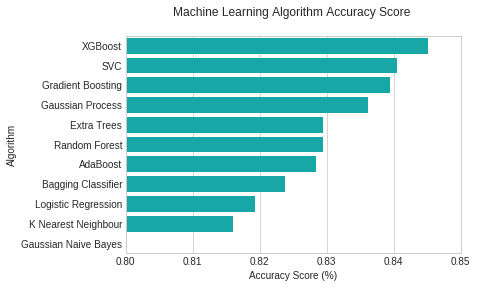

In [201]:
# Plot results
sns.barplot(x='Score', y = 'Model', data = result_df, color = 'c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.xlim(0.80, 0.85)

In [0]:
# 중요도를 보는 함수를 만듭니다.
def importance_plotting(data, x, y, palette, title):
    sns.set(style="whitegrid")
    ft = sns.PairGrid(data, y_vars=y, x_vars=x, size=5, aspect=1.5)
    ft.map(sns.stripplot, orient='h', palette=palette, edgecolor="black", size=15)
    
    for ax, title in zip(ft.axes.flat, titles):
    # 각 그래프마다 새로운 타이틀을 줍니다.
        ax.set(title=title)
    # 그래프를 바로 세워 봅니다.
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)
    plt.show()

In [0]:
# 데이터 프레임에 항목 중요도를 넣습니다.
fi = {'Features':train.columns.tolist(), 'Importance':xgb.feature_importances_}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

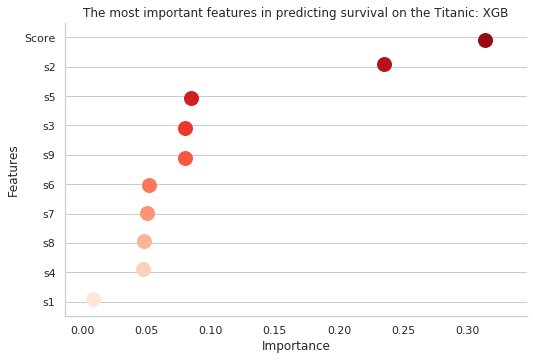

In [204]:
# 그래프 제목
titles = ['The most important features in predicting survival on the Titanic: XGB']

# 그래프 그리기
importance_plotting(importance, 'Importance', 'Features', 'Reds_r', titles)

In [0]:
# 중요도를 데이터프레임에 넣습니다. Logistic regression에서는 중요도보다 coefficients를 사용합니다. 
fi = {'Features':train.columns.tolist(), 'Importance':np.transpose(log.coef_[0])}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

In [206]:
importance.head()

,Features,Importance
0,Score,1.139502
2,s2,0.564280
6,s6,0.506591
8,s8,0.317280
3,s3,0.290268


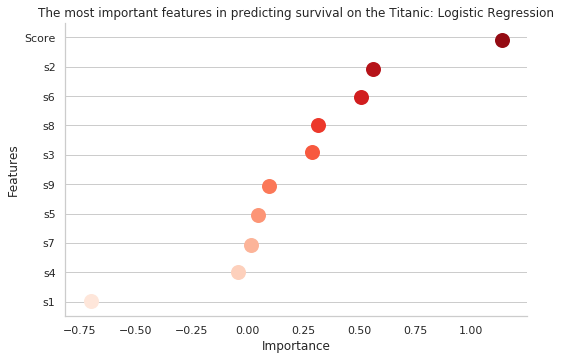

In [207]:
# 그래프 타이틀
titles = ['The most important features in predicting survival on the Titanic: Logistic Regression']

# 그래프 그리기
importance_plotting(importance, 'Importance', 'Features', 'Reds_r', titles)

### 2단계 - 항목 고르기

In [208]:
# 5가지 모델에 대한 항목 중요도 얻기
gbc_imp = pd.DataFrame({'Feature':train.columns, 'gbc importance':gbc.feature_importances_})
xgb_imp = pd.DataFrame({'Feature':train.columns, 'xgb importance':xgb.feature_importances_})
ran_imp = pd.DataFrame({'Feature':train.columns, 'ran importance':ran.feature_importances_})
ext_imp = pd.DataFrame({'Feature':train.columns, 'ext importance':ext.feature_importances_})
ada_imp = pd.DataFrame({'Feature':train.columns, 'ada importance':ada.feature_importances_})

# 이를 하나의 데이터프레임으로
importances = gbc_imp.merge(xgb_imp, on='Feature').merge(ran_imp, on='Feature').merge(ext_imp, on='Feature').merge(ada_imp, on='Feature')

# 항목당 평균 중요도
importances['Average'] = importances.mean(axis=1)

# 랭킹 정하기
importances = importances.sort_values(by='Average', ascending=False).reset_index(drop=True)

# 보기
importances

,Feature,gbc importance,xgb importance,ran importance,ext importance,ada importance,Average
0,Score,0.668438,0.313317,0.344104,0.282588,0.70,0.461689
1,s2,0.127946,0.235064,0.176560,0.150204,0.02,0.141955
2,s3,0.024151,0.080025,0.130265,0.164739,0.00,0.079836
3,s5,0.064342,0.084621,0.039391,0.050578,0.08,0.063786
4,s7,0.035891,0.050738,0.069427,0.069181,0.08,0.061047
5,s4,0.035232,0.047633,0.071481,0.081047,0.04,0.055079
6,s6,0.015373,0.052167,0.072549,0.062683,0.04,0.048554
7,s8,0.017918,0.048299,0.052593,0.071232,0.02,0.042008
8,s9,0.010118,0.079892,0.031804,0.032635,0.00,0.030890
9,s1,0.000592,0.008245,0.011826,0.035114,0.02,0.015155


In [0]:
# 중요도를 다시 데이터 프레임에 넣기
fi = {'Features':importances['Feature'], 'Importance':importances['Average']}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

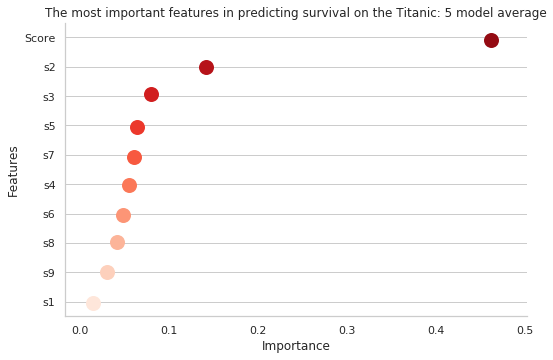

In [210]:
# 그래프 타이틀
titles = ['The most important features in predicting survival on the Titanic: 5 model average']

# 그래프 보기
importance_plotting(importance, 'Importance', 'Features', 'Reds_r', titles)

In [0]:
# 약한 느낌을 주는 것 2개를 뺍니다.
train = train.drop(['s1', 's9'], axis=1)
test = test.drop(['s1', 's9'], axis=1)

# 모델의 변수를 다시 정의하고
X_train = train
X_test = test

# 바꿉니다.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [212]:
X_train

array([[-0.98163689, -0.78811958, -0.82381241, ..., -1.7956009 ,
        -0.79516666, -0.65303145],
       [ 1.97239115,  1.61466757,  2.1875388 , ...,  1.64911767,
         1.24366354,  1.25155454],
       [ 0.35177854,  1.01397078,  0.6818632 , ...,  0.11813164,
         0.73395599, -0.65303145],
       ...,
       [ 0.22869404,  1.01397078,  0.6818632 , ..., -1.7956009 ,
         0.73395599, -0.65303145],
       [ 0.49537713, -0.78811958, -0.07097461, ...,  1.26637116,
        -0.28545911,  1.25155454],
       [-1.20729181, -0.78811958, -0.82381241, ..., -0.64736138,
        -0.79516666, -0.65303145]])

In [213]:
X_test

array([[-0.79701014, -0.78811958, -0.82381241, ..., -0.64736138,
        -0.79516666, -0.65303145],
       [ 0.00303912,  1.61466757,  0.6818632 , ..., -0.64736138,
        -1.81458177, -0.65303145],
       [-0.44827071, -0.78811958, -0.82381241, ...,  0.50087815,
        -1.30487421, -0.17688495],
       ...,
       [-1.10472139, -0.78811958, -0.82381241, ..., -1.41285439,
        -0.79516666, -0.65303145],
       [-1.28934814, -0.78811958, -0.82381241, ..., -0.64736138,
        -1.30487421, -0.65303145],
       [ 0.10560954,  0.413274  , -0.82381241, ..., -0.64736138,
         0.22424844, -0.65303145]])

### 3단계 - 모델 재 트레이닝

In [0]:
# 모델 사용
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier(random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
svc = SVC(probability=True)
ext = ExtraTreesClassifier(random_state=1)
ada = AdaBoostClassifier(random_state=1)
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier(random_state=1)

# 리스트
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
scores_v2 = []

# Fit & cross validate
for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores_v2.append(acc.mean())

In [215]:
# 테이블 만들어서 보기
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'Original Score': scores,
    'Score with feature selection': scores_v2})

result_df = results.sort_values(by='Score with feature selection', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Original Score,Score with feature selection
0,Random Forest,0.829409,0.848499
1,XGBoost,0.845140,0.848473
2,Gradient Boosting,0.839459,0.842867
3,Bagging Classifier,0.823828,0.836164
4,Gaussian Process,0.836176,0.836113
5,Extra Trees,0.829459,0.835015
6,SVC,0.840582,0.832730
7,AdaBoost,0.828348,0.830570
8,K Nearest Neighbour,0.816001,0.827124
9,Logistic Regression,0.819359,0.807062


(0.75, 0.85)

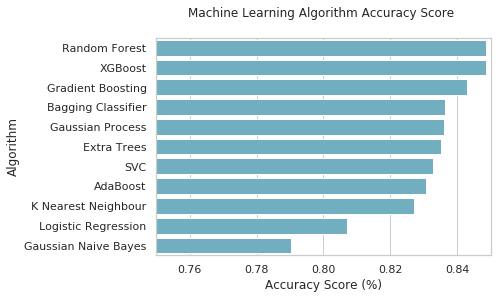

In [216]:
# 결과
sns.barplot(x='Score with feature selection', y = 'Model', data = result_df, color = 'c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.xlim(0.75, 0.85)

### 4단계 - 하이퍼파라미터 튜닝

* SVC

In [217]:
# 파라미터 서치
Cs = [0.001, 0.01, 0.1, 1, 5, 10, 15, 20, 50, 100]
gammas = [0.001, 0.01, 0.1, 1]

# 파라미터 그리드 셋팅
hyperparams = {'C': Cs, 'gamma' : gammas}

# 교차검증
gd=GridSearchCV(estimator = SVC(probability=True), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# 모델 fiting 및 결과
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.835016835016835
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   16.9s finished


* Gradient Boosting Classifier

In [218]:
learning_rate = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [100, 250, 500, 750, 1000, 1250, 1500]

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

gd=GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:  3.1min finished


0.8428731762065096
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.005, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


* Logistic Regression

In [219]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

hyperparams = {'penalty': penalty, 'C': C}

gd=GridSearchCV(estimator = LogisticRegression(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8170594837261503
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


* XGBoost Step 1

In [220]:
learning_rate = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [10, 25, 50, 75, 100, 250, 500, 750, 1000]

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

gd=GridSearchCV(estimator = XGBClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8496071829405163
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=75, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   39.6s finished


* XGB Step 2

In [221]:
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]
min_child_weight = [1, 2, 3, 4, 5, 6]

hyperparams = {'max_depth': max_depth, 'min_child_weight': min_child_weight}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.0001, n_estimators=10), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 48 candidates, totalling 240 fits
0.8395061728395061
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.0001, max_delta_step=0, max_depth=7,
              min_child_weight=3, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    2.8s finished


* XGB Step 3

In [222]:
gamma = [i*0.1 for i in range(0,5)]

hyperparams = {'gamma': gamma}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.0001, n_estimators=10, max_depth=3, 
                                          min_child_weight=1), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.8058361391694725
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0,
              learning_rate=0.0001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished


* XGB Step 4

In [223]:
subsample = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
colsample_bytree = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
    
hyperparams = {'subsample': subsample, 'colsample_bytree': colsample_bytree}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.0001, n_estimators=10, max_depth=3, 
                                          min_child_weight=1, gamma=0), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 81 candidates, totalling 405 fits
0.8305274971941639
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.0001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.85, verbosity=1)


[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    4.1s finished


* * XGB Step 5

In [224]:
reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]
    
hyperparams = {'reg_alpha': reg_alpha}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.0001, n_estimators=10, max_depth=3, 
                                          min_child_weight=1, gamma=0, subsample=0.6, colsample_bytree=0.9),
                                         param_grid = hyperparams, verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.819304152637486
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.0001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished


* Gaussian Process

In [225]:
n_restarts_optimizer = [0, 1, 2, 3]
max_iter_predict = [1, 2, 5, 10, 20, 35, 50, 100]
warm_start = [True, False]

hyperparams = {'n_restarts_optimizer': n_restarts_optimizer, 'max_iter_predict': max_iter_predict, 'warm_start': warm_start}

gd=GridSearchCV(estimator = GaussianProcessClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  1.8min finished


0.8406285072951739
GaussianProcessClassifier(copy_X_train=True, kernel=None, max_iter_predict=1,
                          multi_class='one_vs_rest', n_jobs=None,
                          n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
                          random_state=None, warm_start=True)


* Adaboost

In [226]:
n_estimators = [10, 25, 50, 75, 100, 125, 150, 200]
learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

hyperparams = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

gd=GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8395061728395061
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.5,
                   n_estimators=50, random_state=None)


[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:   49.2s finished


* KNeighbors

In [227]:
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30]

hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}

gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 300 candidates, totalling 1500 fits
0.8361391694725028
KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='distance')


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:   11.4s finished


* Random Forest

In [228]:
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [1, 3, 5, 7]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [2, 4, 6, 8, 10]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

gd=GridSearchCV(estimator = RandomForestClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
0.8529741863075196
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:  7.7min finished


* Extra Trees

In [229]:
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [1, 3, 5, 7]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [2, 4, 6, 8, 10]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

gd=GridSearchCV(estimator = ExtraTreesClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
0.8529741863075196
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features=3, max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=6,
                     min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)


[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:  5.7min finished


* Bagging Classifier

In [230]:
n_estimators = [10, 15, 20, 25, 50, 75, 100, 150]
max_samples = [1, 2, 3, 5, 7, 10, 15, 20, 25, 30, 50]
max_features = [1, 3, 5, 7]

hyperparams = {'n_estimators': n_estimators, 'max_samples': max_samples, 'max_features': max_features}

gd=GridSearchCV(estimator = BaggingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 352 candidates, totalling 1760 fits
0.8372615039281706
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=5, max_samples=15, n_estimators=15, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)


[Parallel(n_jobs=1)]: Done 1760 out of 1760 | elapsed:  2.7min finished


* Gaussian Naive Bayes -  파라미터 튜닝이 안 되는 모델이니 기존 점수 그대로

### 5단계 - 모델 재 트레이닝

In [0]:
# 튜닝 모델 시작
ran = RandomForestClassifier(n_estimators=25,
                             max_depth=3, 
                             max_features=3,
                             min_samples_leaf=2, 
                             min_samples_split=8,  
                             random_state=1)

knn = KNeighborsClassifier(algorithm='auto', 
                           leaf_size=1, 
                           n_neighbors=5, 
                           weights='uniform')

log = LogisticRegression(C=2.7825594022071245,
                         penalty='l2')

xgb = XGBClassifier(learning_rate=0.0001, 
                    n_estimators=10,
                    random_state=1)

gbc = GradientBoostingClassifier(learning_rate=0.0005,
                                 n_estimators=1250,
                                 random_state=1)

svc = SVC(probability=True)

ext = ExtraTreesClassifier(max_depth=None, 
                           max_features=3,
                           min_samples_leaf=2, 
                           min_samples_split=8,
                           n_estimators=10,
                           random_state=1)

ada = AdaBoostClassifier(learning_rate=0.1, 
                         n_estimators=50,
                         random_state=1)

gpc = GaussianProcessClassifier()

bag = BaggingClassifier(random_state=1)

# 리스트
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
scores_v3 = []

# Fit & 교차 검증
for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores_v3.append(acc.mean())

In [232]:
# 랭킹 테이블 생성
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'Original Score': scores,
    'Score with feature selection': scores_v2,
    'Score with tuned parameters': scores_v3})

result_df = results.sort_values(by='Score with tuned parameters', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Original Score,Score with feature selection,Score with tuned parameters
0,Extra Trees,0.829459,0.835015,0.846276
1,Bagging Classifier,0.823828,0.836164,0.836164
2,Gaussian Process,0.836176,0.836113,0.836113
3,Random Forest,0.829409,0.848499,0.835040
4,AdaBoost,0.828348,0.830570,0.834016
5,XGBoost,0.845140,0.848473,0.832742
6,SVC,0.840582,0.832730,0.832730
7,K Nearest Neighbour,0.816001,0.827124,0.829409
8,Gradient Boosting,0.839459,0.842867,0.816101
9,Logistic Regression,0.819359,0.807062,0.809309


(0.75, 0.86)

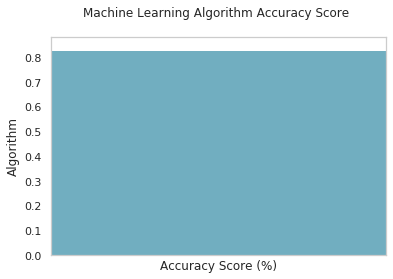

In [233]:
# 결과
sns.barplot(x=None, y = None, data = result_df, color = 'c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.xlim(0.75, 0.86)

###6단계 - Voting Classfier

In [234]:
#튜닝한 파라미터로 하드보팅
grid_hard = VotingClassifier(estimators = [('Random Forest', ran), 
                                           ('Logistic Regression', log),
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Extra Trees', ext),
                                           ('AdaBoost', ada),
                                           ('Gaussian Process', gpc),
                                           ('SVC', svc),
                                           ('K Nearest Neighbour', knn),
                                           ('Bagging Classifier', bag)], voting = 'hard')

grid_hard_cv = model_selection.cross_validate(grid_hard, X_train, y_train, cv = 10)
grid_hard.fit(X_train, y_train)

print("Hard voting on test set score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))

Hard voting on test set score mean: 84.06


In [235]:
grid_soft = VotingClassifier(estimators = [('Random Forest', ran), 
                                           ('Logistic Regression', log),
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Extra Trees', ext),
                                           ('AdaBoost', ada),
                                           ('Gaussian Process', gpc),
                                           ('SVC', svc),
                                           ('K Nearest Neighbour', knn),
                                           ('Bagging Classifier', bag)], voting = 'soft')

grid_soft_cv = model_selection.cross_validate(grid_soft, X_train, y_train, cv = 10)
grid_soft.fit(X_train, y_train)

print("Soft voting on test set score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))

Soft voting on test set score mean: 83.84


## Task 9 - 마지막 모델 예측 & 제출 파일 다운로드

In [0]:
# Final predictions
predictions = grid_hard.predict(X_test)

submission = pd.concat([pd.DataFrame(passId), pd.DataFrame(predictions)], axis = 'columns')

submission.columns = ["PassengerId", "Survived"]
submission.to_csv('titanic_submission.csv', header = True, index = False)